<a href="https://colab.research.google.com/github/Rahman17309/ASSIGNMENT1/blob/main/Clustering_Crime_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing

In [2]:
import pandas as pd

df = pd.read_csv("/content/crime_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


Renaming the Unnamed: 0 Column into States

In [4]:
df.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)

In [5]:
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
df['States'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
import warnings
warnings.filterwarnings('ignore')

# Data Exploration

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


Missing Values

In [9]:
df.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

Duplicated Values

In [10]:
df.duplicated().sum()

0

Since we don't had any missing / Null values or Duplicate values we can proceed futher for EDA process

# Exploratory Data Analysis

Lets analyze the features by creating histograms to understand the distribution

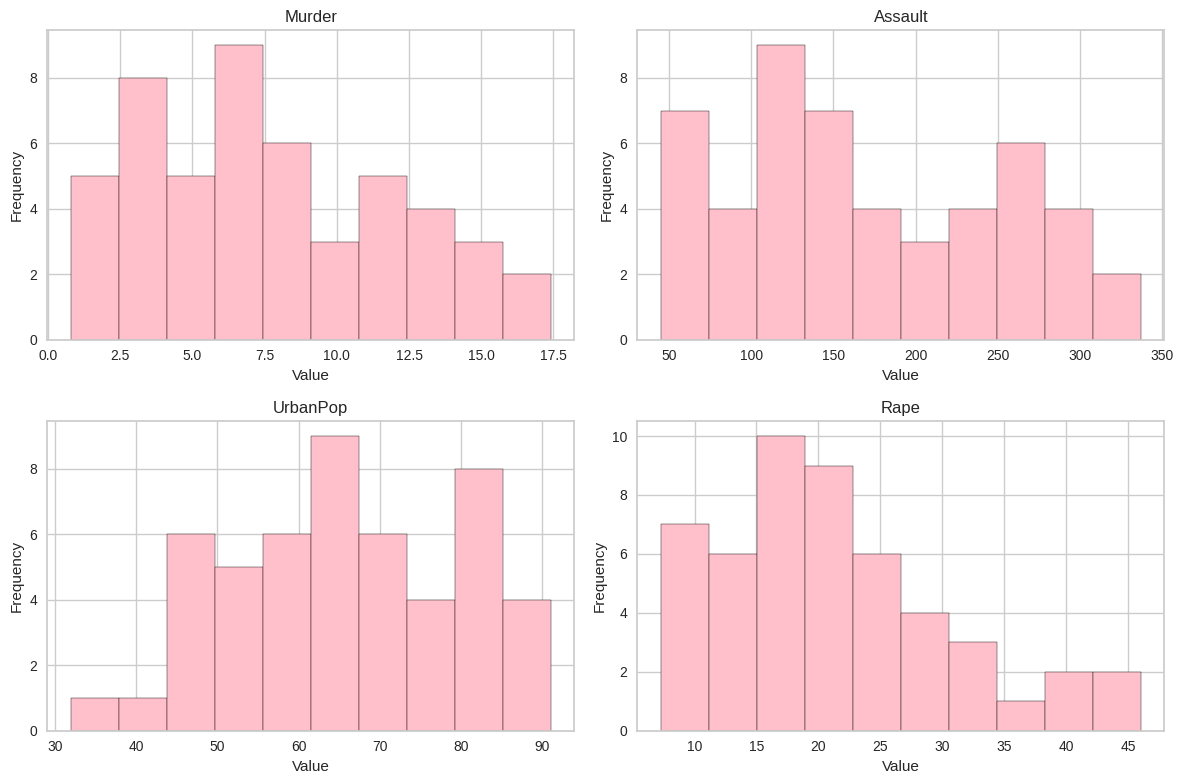

In [11]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[1:], 1):  # Exclude 'States'
    plt.subplot(2, 2, i)
    plt.hist(df[column], bins=10, color='pink', edgecolor='black')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Plotting kernel density plots

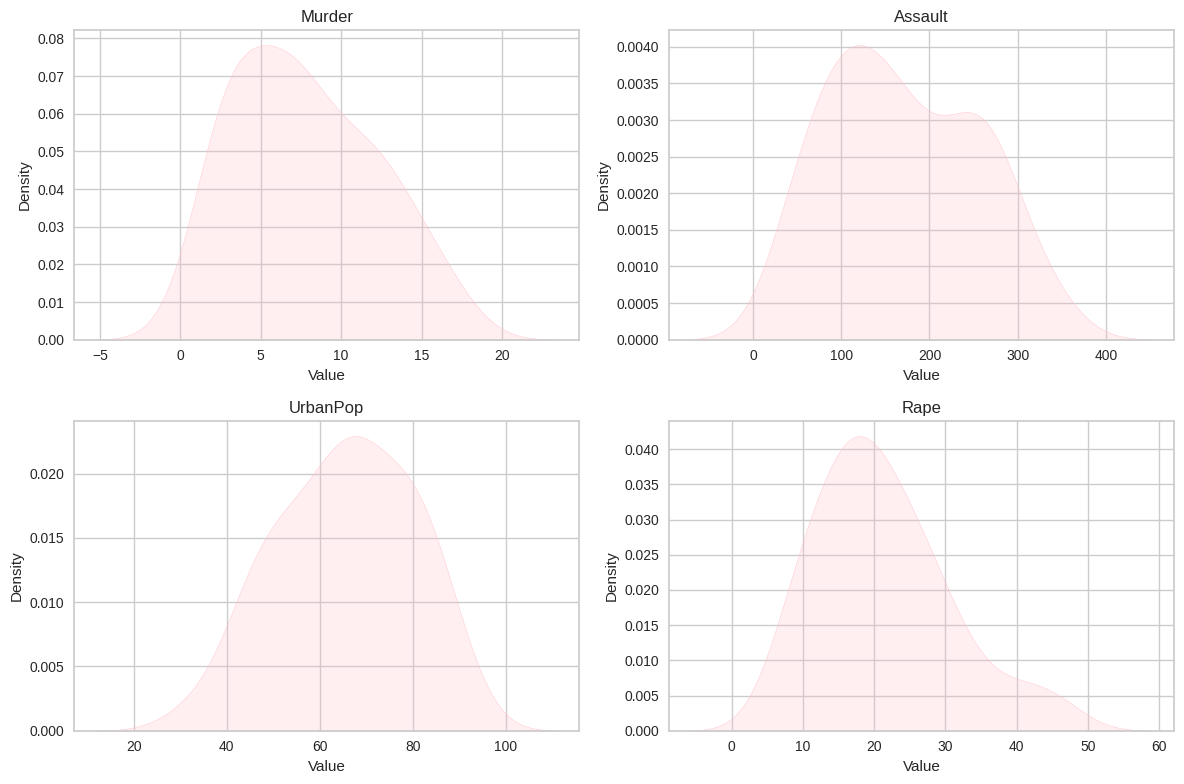

In [12]:
import seaborn as sns

plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[1:], 1):  # Exclude 'States'
    plt.subplot(2, 2, i)
    sns.kdeplot(df[column], color='pink', shade=True)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

Outliers Detection

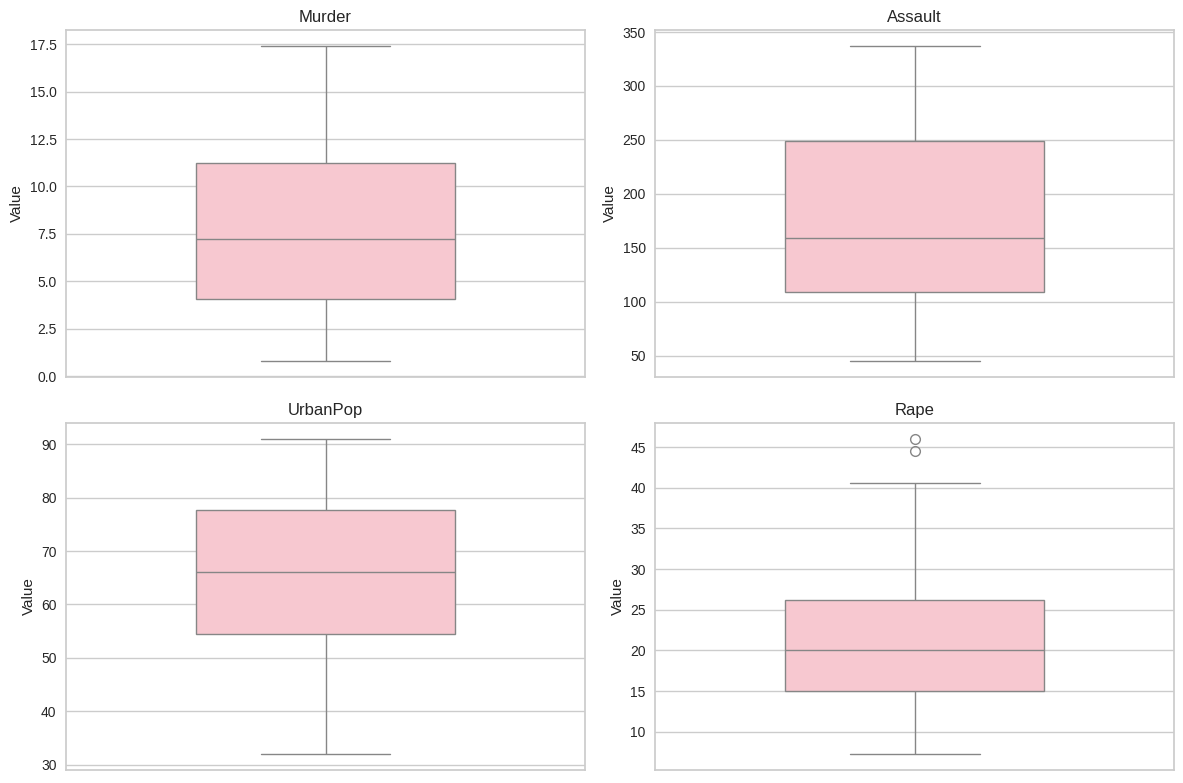

In [13]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[1:], 1):  # Exclude 'States'
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[column], color='pink', width=0.5)
    plt.title(column)
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

Plotting boxplot for every feature

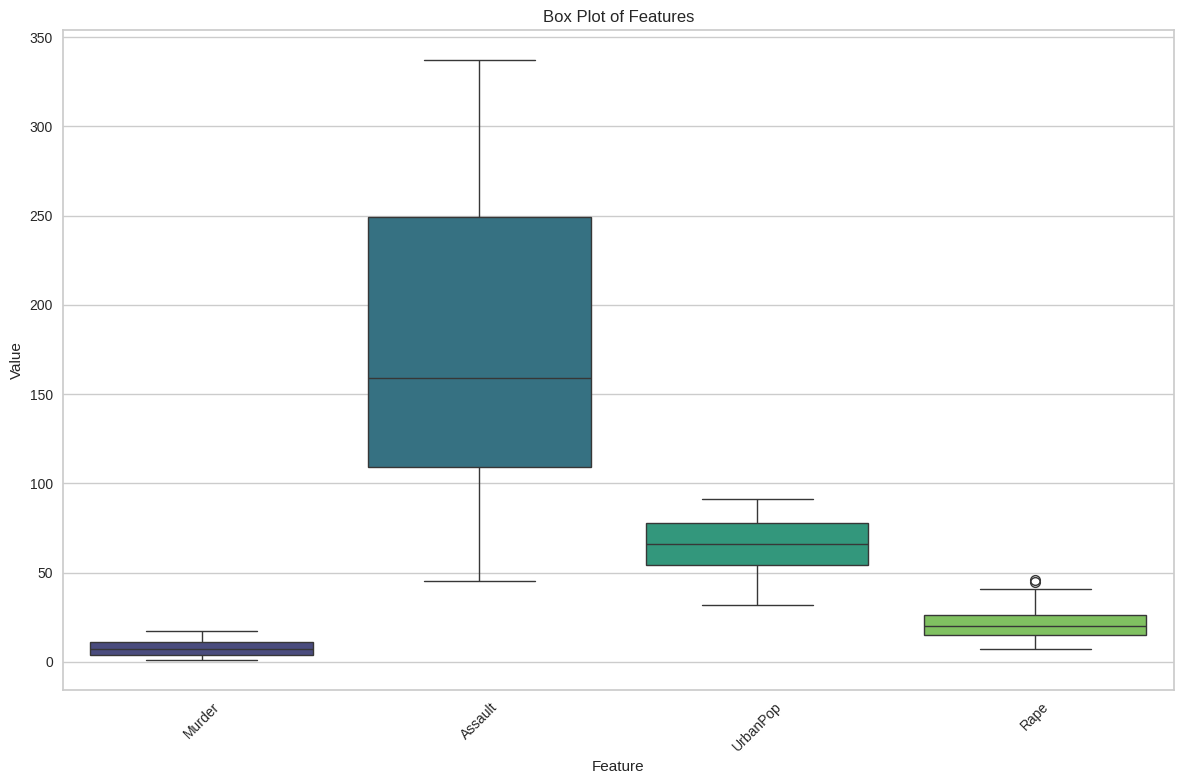

In [14]:
melted_df = pd.melt(df, id_vars=['States'], var_name='Feature', value_name='Value')

plt.figure(figsize=(12, 8))
sns.boxplot(data=melted_df, x='Feature', y='Value', palette='viridis')
plt.xticks(rotation=45)
plt.title('Box Plot of Features')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

Apply square root transformation

In [15]:
df_transformed = df.copy()
df_transformed[df.columns[1:]] = np.sqrt(df[df.columns[1:]])

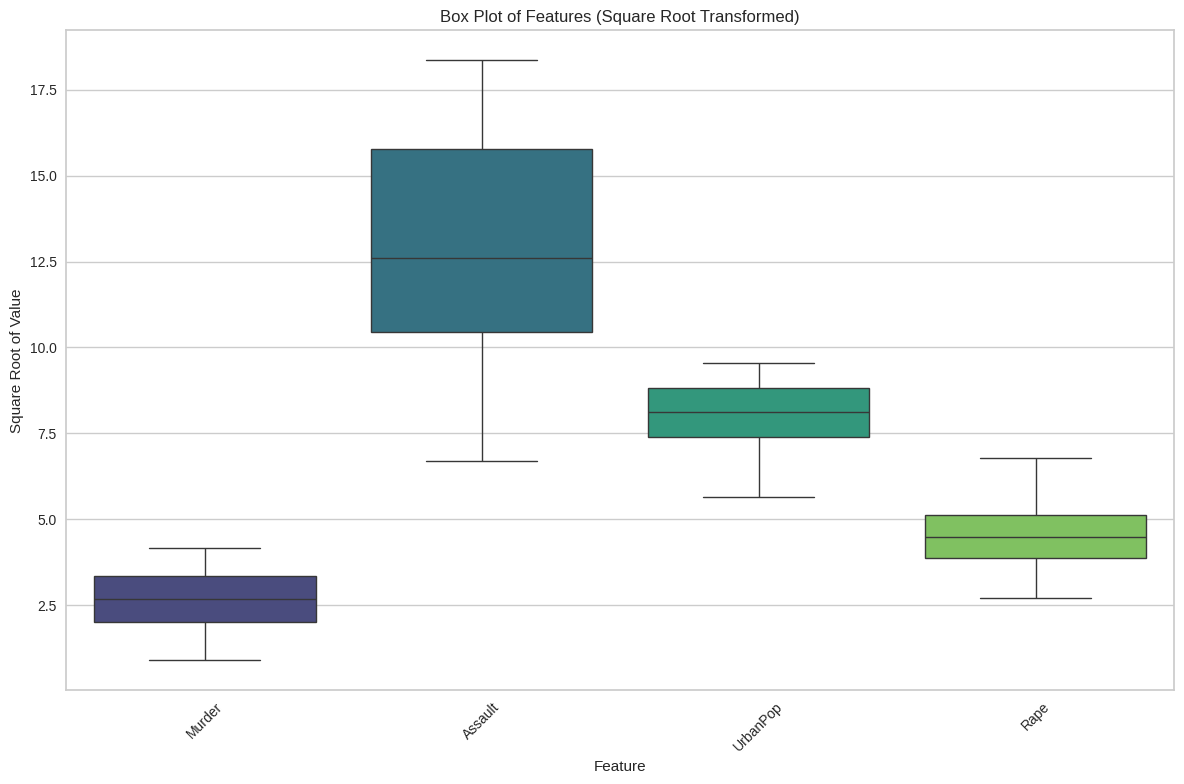

In [16]:
melted_df = pd.melt(df_transformed, id_vars=['States'], var_name='Feature', value_name='Value')

plt.figure(figsize=(12, 8))
sns.boxplot(data=melted_df, x='Feature', y='Value', palette='viridis')
plt.xticks(rotation=45)
plt.title('Box Plot of Features (Square Root Transformed)')
plt.xlabel('Feature')
plt.ylabel('Square Root of Value')
plt.tight_layout()
plt.show()

# Data Visualization

correlation matrix

In [17]:
corr = df.corr()

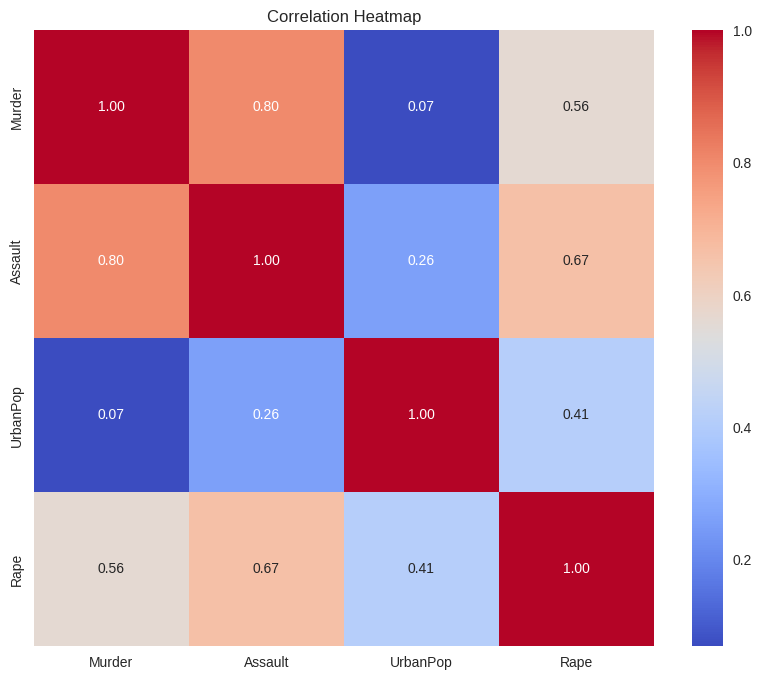

In [18]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

Pair plot

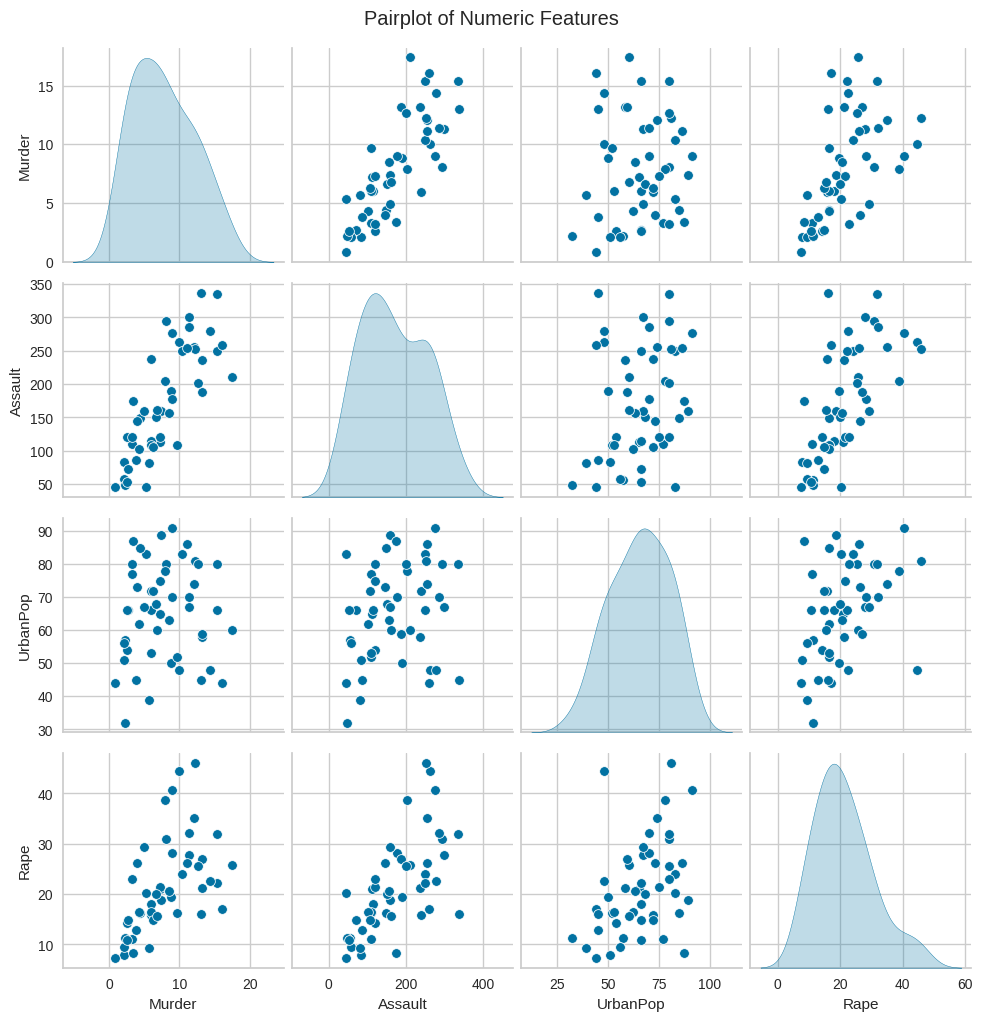

In [19]:
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

Unique points in this correlation matrix:



1.   Assault is positively correlated with Murder
2.   Assualt is positively correlated with Rape
3.   Rape is positively correlated with Murder



# Murder Rate

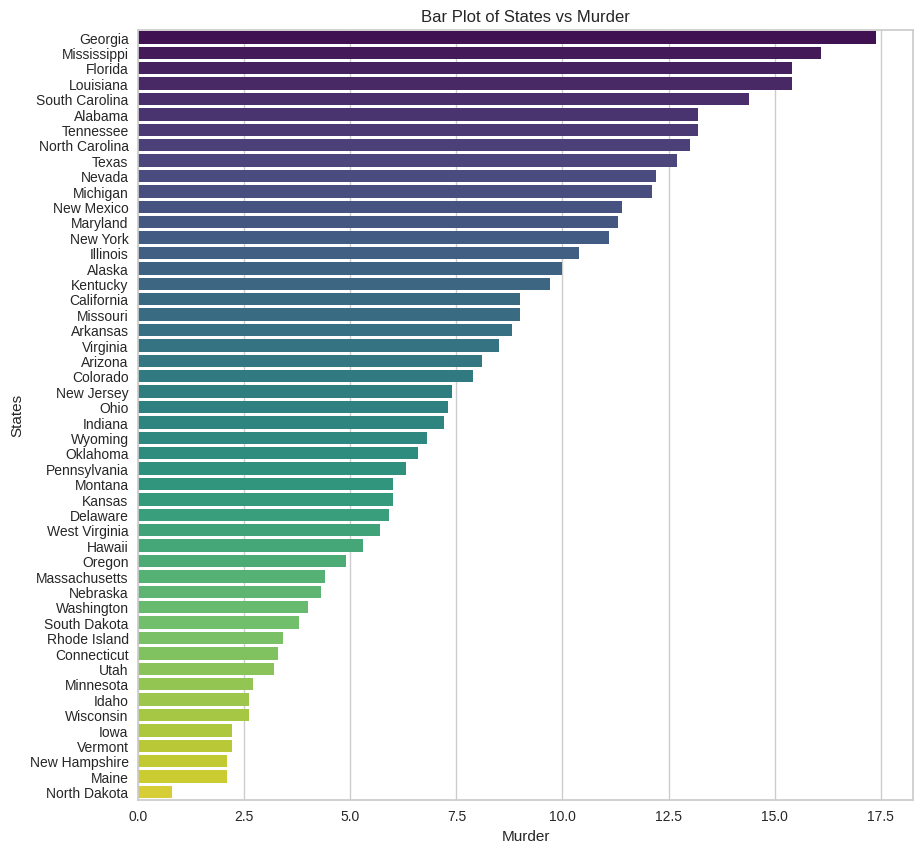

In [20]:
# Sort DataFrame based on Murder
df_sorted_murder = df.sort_values(by='Murder', ascending=False)

# Plotting bar plot for Murder
plt.figure(figsize=(10, 10))
sns.barplot(x='Murder', y='States', data=df_sorted_murder, palette='viridis')
plt.title('Bar Plot of States vs Murder')
plt.xlabel('Murder')
plt.ylabel('States')
plt.show()

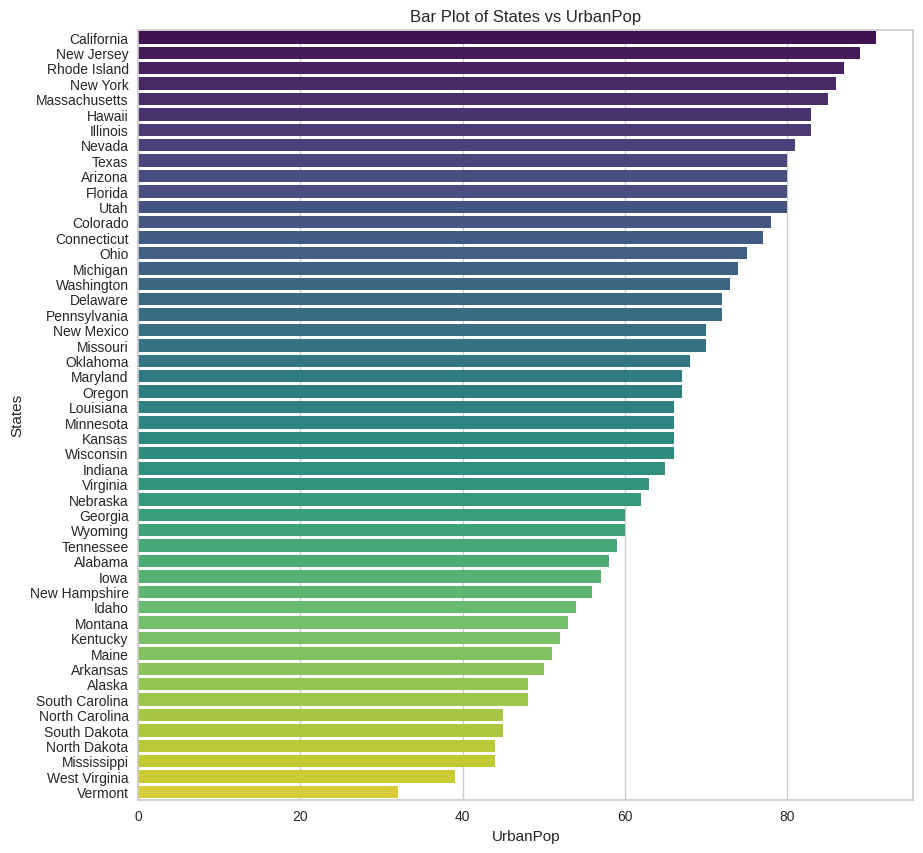

In [21]:
# Sort DataFrame based on UrbanPop
df_sorted_urbanpop = df.sort_values(by='UrbanPop', ascending=False)

# Plotting bar plot for UrbanPop
plt.figure(figsize=(10, 10))
sns.barplot(x='UrbanPop', y='States', data=df_sorted_urbanpop, palette='viridis')
plt.title('Bar Plot of States vs UrbanPop')
plt.xlabel('UrbanPop')
plt.ylabel('States')
plt.show()

Observation: There is no direct relation between Murder Rate and Urban Population but you can see a less number of Murder rate can be seen North Dakota as it Urban population is less compare to Florida and has the opposite effect

In [22]:
print('Top 10 States with Highest Murder Rate')
df.sort_values('Murder',ascending=False).head(10)

Top 10 States with Highest Murder Rate


,States,Murder,Assault,UrbanPop,Rape
9,Georgia,17.4,211,60,25.8
23,Mississippi,16.1,259,44,17.1
8,Florida,15.4,335,80,31.9
17,Louisiana,15.4,249,66,22.2
39,South Carolina,14.4,279,48,22.5
0,Alabama,13.2,236,58,21.2
41,Tennessee,13.2,188,59,26.9
32,North Carolina,13.0,337,45,16.1
42,Texas,12.7,201,80,25.5
27,Nevada,12.2,252,81,46.0


In [23]:
import plotly.express as px

# Create a DataFrame with the top 10 states with the highest murder rate
top_10_murder_rate = df.sort_values('Murder', ascending=False).head(10)

# Extract the state names and murder rates
state_names = top_10_murder_rate['States'].tolist()
murder_rates = top_10_murder_rate['Murder'].tolist()

# Create a Plotly pie chart
fig = px.pie(top_10_murder_rate, values='Murder', names='States', title='Top 10 States with Highest Murder Rate')
fig.update_traces(textposition='inside', textinfo='percent+label')  # Show percentage and label inside the pie slices
fig.update_layout(showlegend=False)  # Hide legend
fig.show()


In [24]:
print('Top 10 States with Lowest Murder Rate')
df.sort_values('Murder',ascending=True).head(10)

Top 10 States with Lowest Murder Rate


,States,Murder,Assault,UrbanPop,Rape
33,North Dakota,0.8,45,44,7.3
28,New Hampshire,2.1,57,56,9.5
18,Maine,2.1,83,51,7.8
14,Iowa,2.2,56,57,11.3
44,Vermont,2.2,48,32,11.2
48,Wisconsin,2.6,53,66,10.8
11,Idaho,2.6,120,54,14.2
22,Minnesota,2.7,72,66,14.9
43,Utah,3.2,120,80,22.9
6,Connecticut,3.3,110,77,11.1


In [25]:
# Create a DataFrame with the top 10 states with the lowest murder rate
top_10_lowest_murder_rate = df.sort_values('Murder', ascending=True).head(10)

# Extract the state names and murder rates
state_names = top_10_lowest_murder_rate['States'].tolist()
murder_rates = top_10_lowest_murder_rate['Murder'].tolist()

# Create a Plotly pie chart
fig = px.pie(top_10_lowest_murder_rate, values='Murder', names='States', title='Top 10 States with Lowest Murder Rate')
fig.update_traces(textposition='inside', textinfo='percent+label')  # Show percentage and label inside the pie slices
fig.update_layout(showlegend=False)  # Hide legend
fig.show()


Observations:



*  Highest Murder Rate : Georgia, Missisippi and Florida
*   Lowest Murder Rate : North Dakota, New Hampshire, Idaho, Iowa, Maine, Vermont and Wisconsin.



# Assault Rate

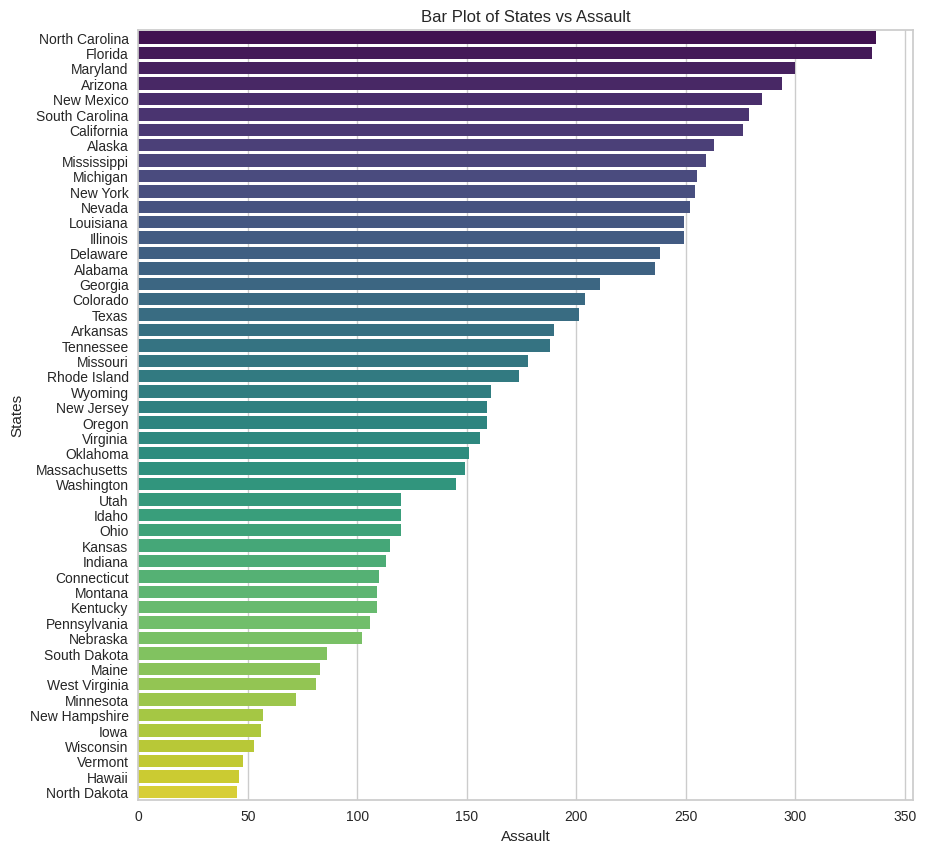

In [39]:
# Sort DataFrame based on Assault
df_sorted_Assault = df.sort_values(by='Assault', ascending=False)

# Plotting bar plot for Assault
plt.figure(figsize=(10, 10))
sns.barplot(x='Assault', y='States', data=df_sorted_Assault, palette='viridis')
plt.title('Bar Plot of States vs Assault')
plt.xlabel('Assault')
plt.ylabel('States')
plt.show()

In [30]:
print('Top 10 States with Highest Assault Rate')
df.sort_values('Assault',ascending=False, ignore_index=True).head(10)

Top 10 States with Highest Assault Rate


,States,Murder,Assault,UrbanPop,Rape
0,North Carolina,13.0,337,45,16.1
1,Florida,15.4,335,80,31.9
2,Maryland,11.3,300,67,27.8
3,Arizona,8.1,294,80,31.0
4,New Mexico,11.4,285,70,32.1
5,South Carolina,14.4,279,48,22.5
6,California,9.0,276,91,40.6
7,Alaska,10.0,263,48,44.5
8,Mississippi,16.1,259,44,17.1
9,Michigan,12.1,255,74,35.1


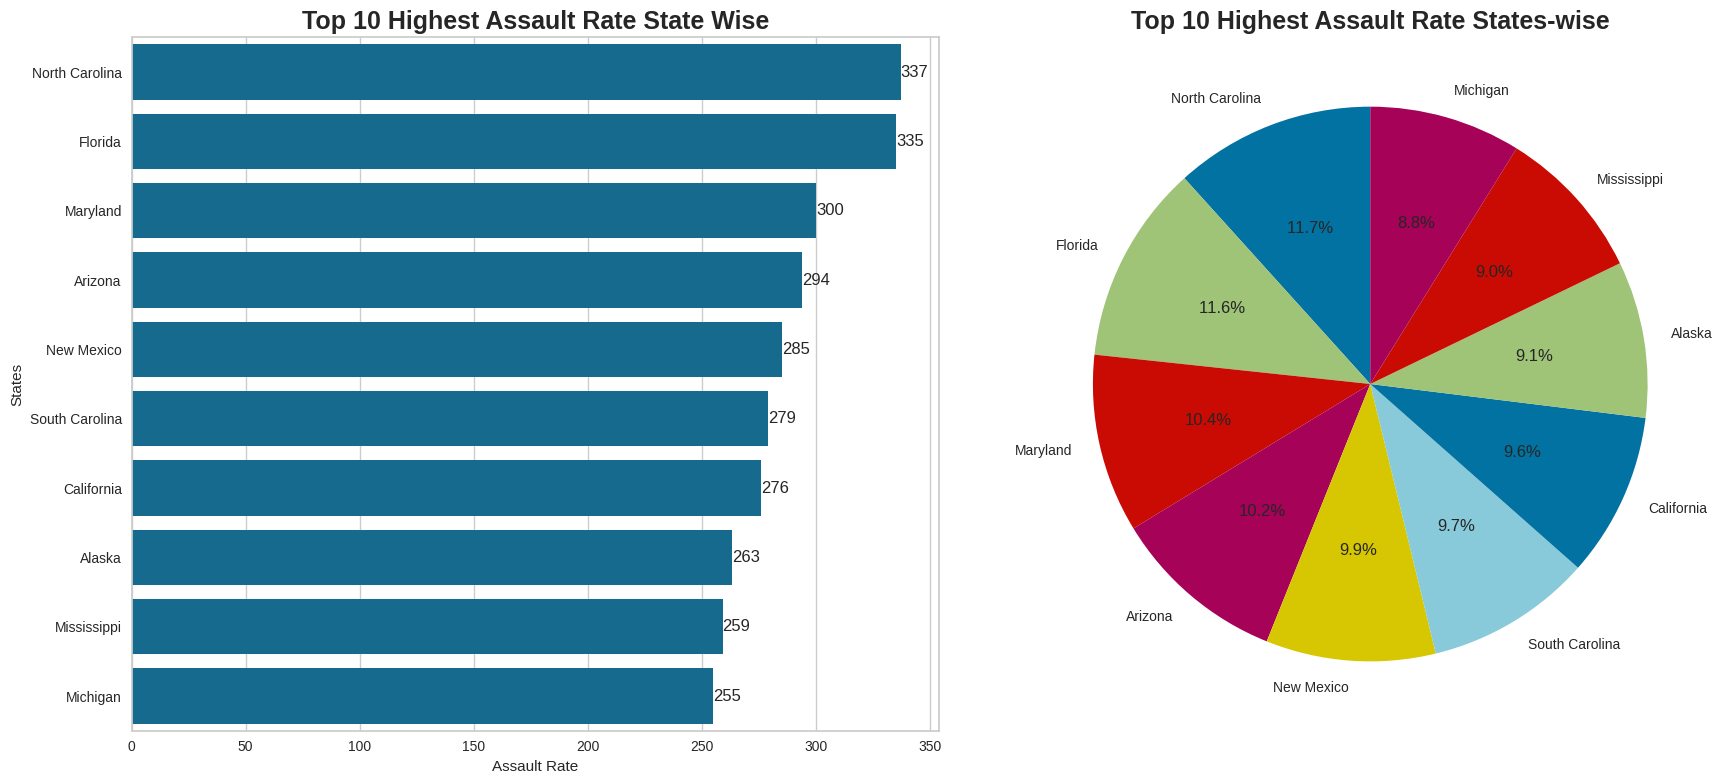

In [34]:
 #Sort DataFrame based on Assault
Assault = df.sort_values('Assault', ascending=False)

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plotting bar plot
sns.barplot(x=Assault.Assault[:10], y=Assault.States[:10], ax=axes[0])
for i, val in enumerate(Assault.Assault[:10]):
    axes[0].text(val, i, str(val), va='center', ha='left', fontsize=12)

axes[0].set_title('Top 10 Highest Assault Rate State Wise', fontsize=18, fontweight='bold')
axes[0].set_xlabel('Assault Rate')
axes[0].set_ylabel('States')

# Plotting pie chart
axes[1].pie(Assault.Assault[:10], labels=Assault.States[:10], autopct='%1.1f%%', startangle=90)
axes[1].set_title("Top 10 Highest Assault Rate States-wise", fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()

In [31]:
print('Top 10 States with Lowest Assault Rate')
df.sort_values('Assault',ascending=True, ignore_index=True).head(10)

Top 10 States with Lowest Assault Rate


,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,Hawaii,5.3,46,83,20.2
2,Vermont,2.2,48,32,11.2
3,Wisconsin,2.6,53,66,10.8
4,Iowa,2.2,56,57,11.3
5,New Hampshire,2.1,57,56,9.5
6,Minnesota,2.7,72,66,14.9
7,West Virginia,5.7,81,39,9.3
8,Maine,2.1,83,51,7.8
9,South Dakota,3.8,86,45,12.8


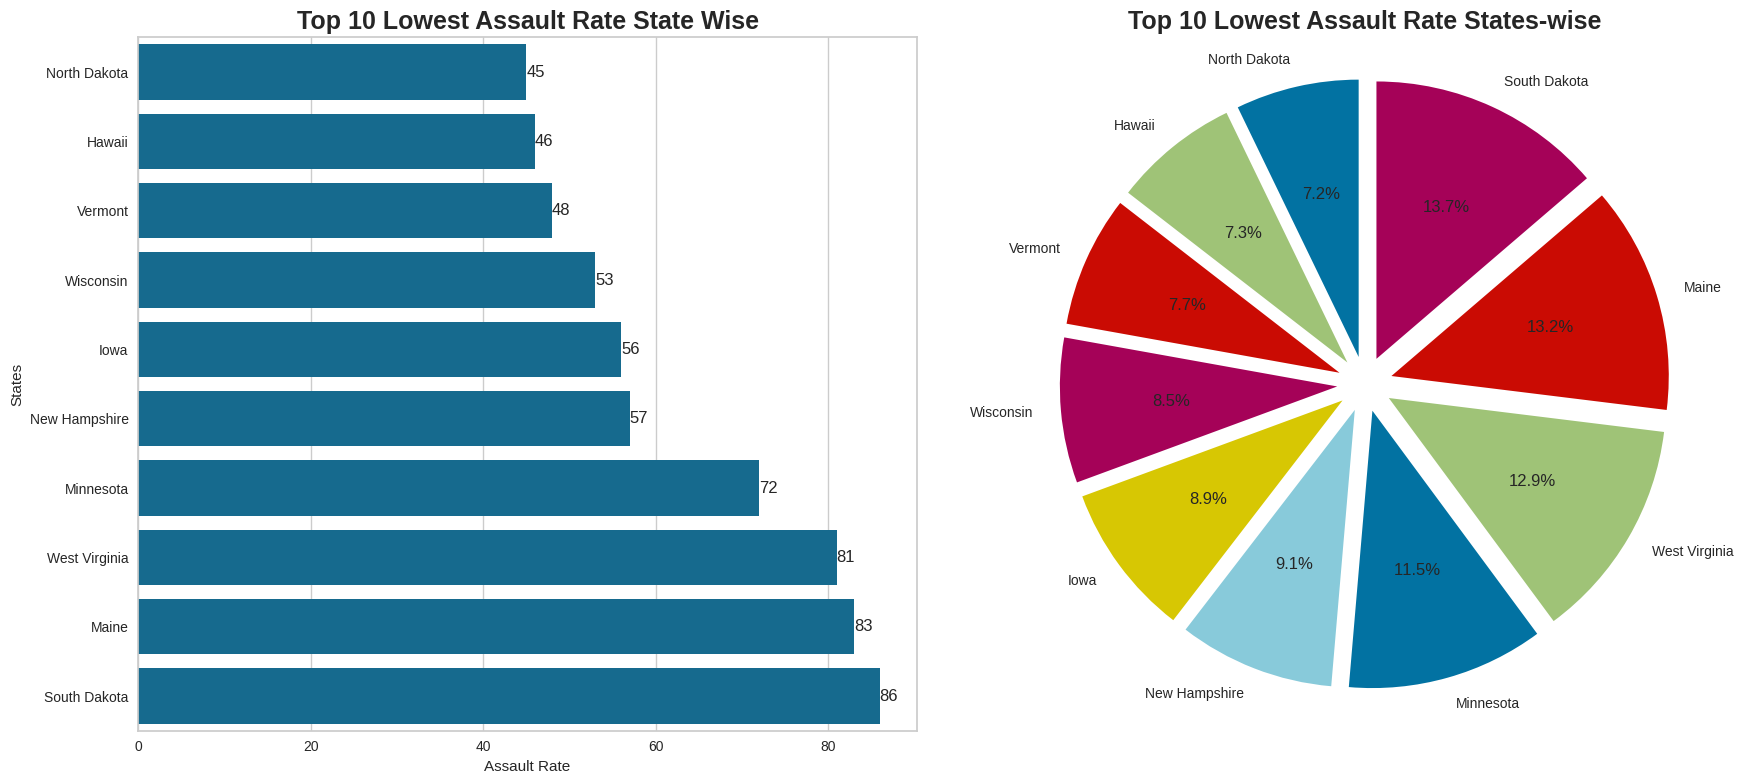

In [36]:
# Sort DataFrame based on Assault in ascending order (lowest to highest)
assault = df.sort_values('Assault', ascending=True)

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plotting bar plot
sns.barplot(x=assault.Assault[:10], y=assault.States[:10], ax=axes[0])
for i, val in enumerate(assault.Assault[:10]):
    axes[0].text(val, i, str(val), va='center', ha='left', fontsize=12)

axes[0].set_title('Top 10 Lowest Assault Rate State Wise', fontsize=18, fontweight='bold')
axes[0].set_xlabel('Assault Rate')
axes[0].set_ylabel('States')

# Plotting pie chart
axes[1].pie(assault.Assault[:10], labels=assault.States[:10], autopct='%1.1f%%', startangle=90, explode=[0.1]*10)
axes[1].set_title("Top 10 Lowest Assault Rate States-wise", fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()

Observations:



*   Highest Assault Rate : North Carolina, Florida and Maryland

*   Lowest Assault Rate : North Dakota, Hawaii and Vermont.




# Rape Rate

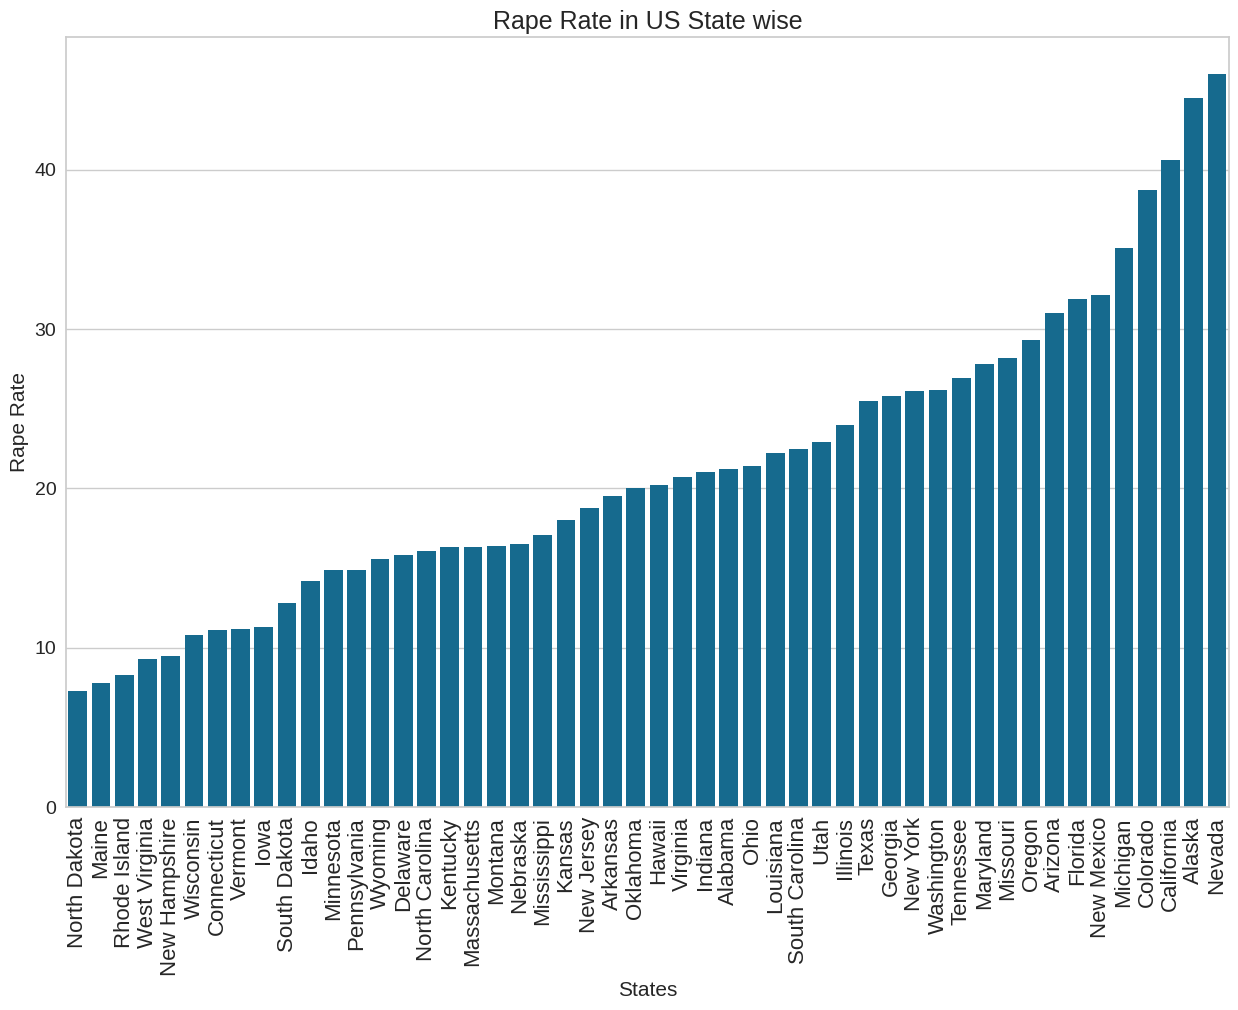

In [43]:
plt.figure(figsize=(15,10))
# make barplot and sort bars
sns.barplot(x='States',
            y="Rape",
            data=df,
            order=df.sort_values('Rape').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Rape Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Rape Rate in US State wise", size=18)
plt.show()

In [44]:
print('Top 10 States with Highest Rape Rate')
df.sort_values('Rape',ascending=False, ignore_index=True).head(10)

Top 10 States with Highest Rape Rate


,States,Murder,Assault,UrbanPop,Rape
0,Nevada,12.2,252,81,46.0
1,Alaska,10.0,263,48,44.5
2,California,9.0,276,91,40.6
3,Colorado,7.9,204,78,38.7
4,Michigan,12.1,255,74,35.1
5,New Mexico,11.4,285,70,32.1
6,Florida,15.4,335,80,31.9
7,Arizona,8.1,294,80,31.0
8,Oregon,4.9,159,67,29.3
9,Missouri,9.0,178,70,28.2


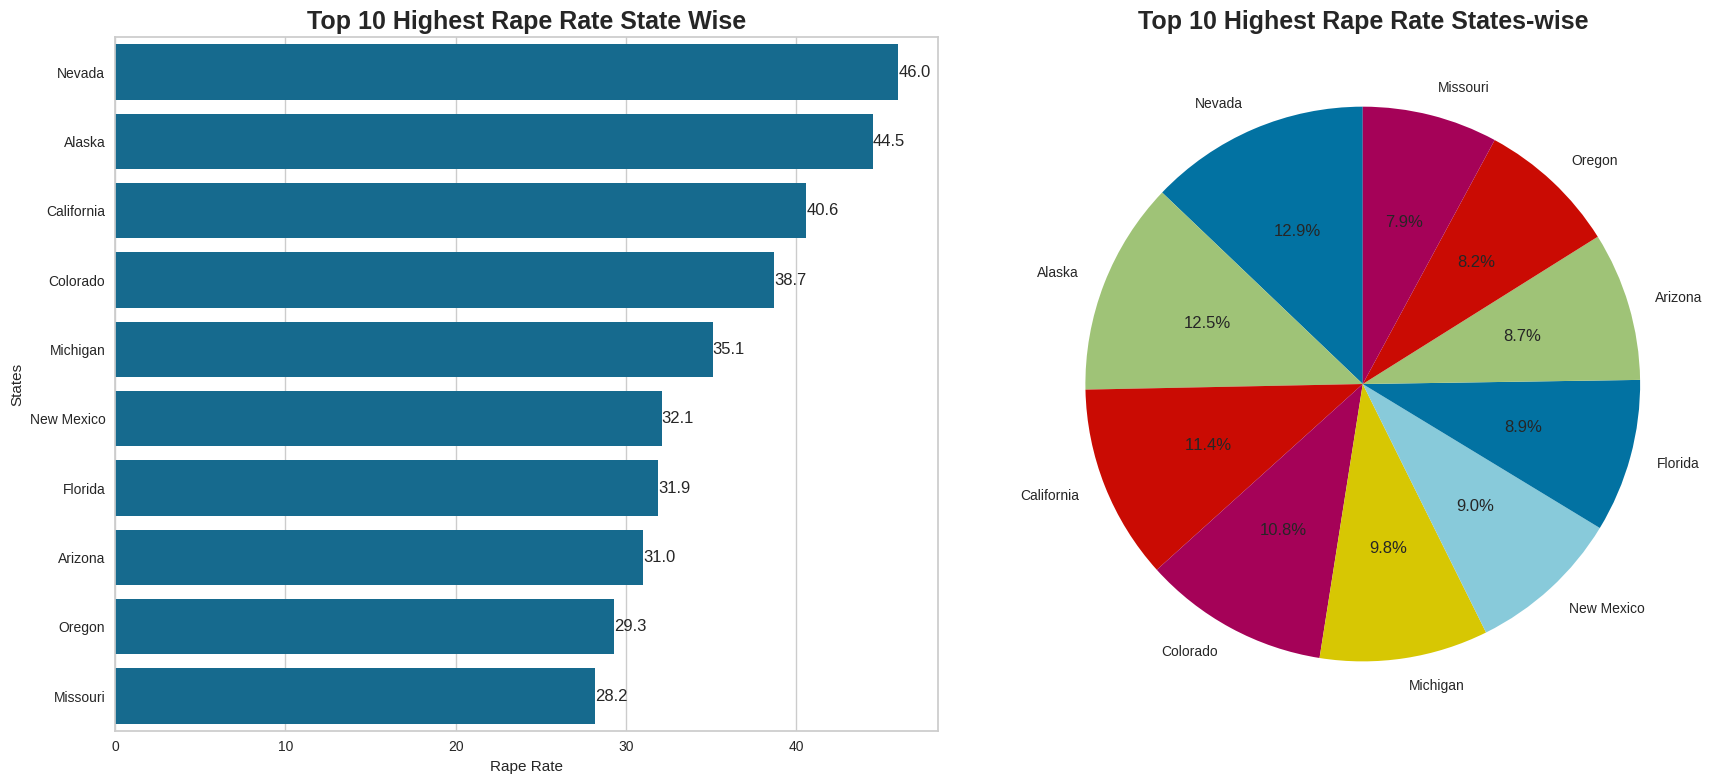

In [47]:
# Sort DataFrame based on Rape
Rape = df.sort_values('Rape', ascending=False)

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plotting bar plot
sns.barplot(x=Rape.Rape[:10], y=Rape.States[:10], ax=axes[0])
for i, val in enumerate(Rape.Rape[:10]):
    axes[0].text(val, i, str(val), va='center', ha='left', fontsize=12)

axes[0].set_title('Top 10 Highest Rape Rate State Wise', fontsize=18, fontweight='bold')
axes[0].set_xlabel('Rape Rate')
axes[0].set_ylabel('States')

# Plotting pie chart
axes[1].pie(Rape.Rape[:10], labels=Rape.States[:10], autopct='%1.1f%%', startangle=90)
axes[1].set_title("Top 10 Highest Rape Rate States-wise", fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()

In [45]:
print('Top 10 States with Lowest Rape Rate')
df.sort_values('Rape',ascending=True, ignore_index=True).head(10)

Top 10 States with Lowest Rape Rate


,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,Maine,2.1,83,51,7.8
2,Rhode Island,3.4,174,87,8.3
3,West Virginia,5.7,81,39,9.3
4,New Hampshire,2.1,57,56,9.5
5,Wisconsin,2.6,53,66,10.8
6,Connecticut,3.3,110,77,11.1
7,Vermont,2.2,48,32,11.2
8,Iowa,2.2,56,57,11.3
9,South Dakota,3.8,86,45,12.8


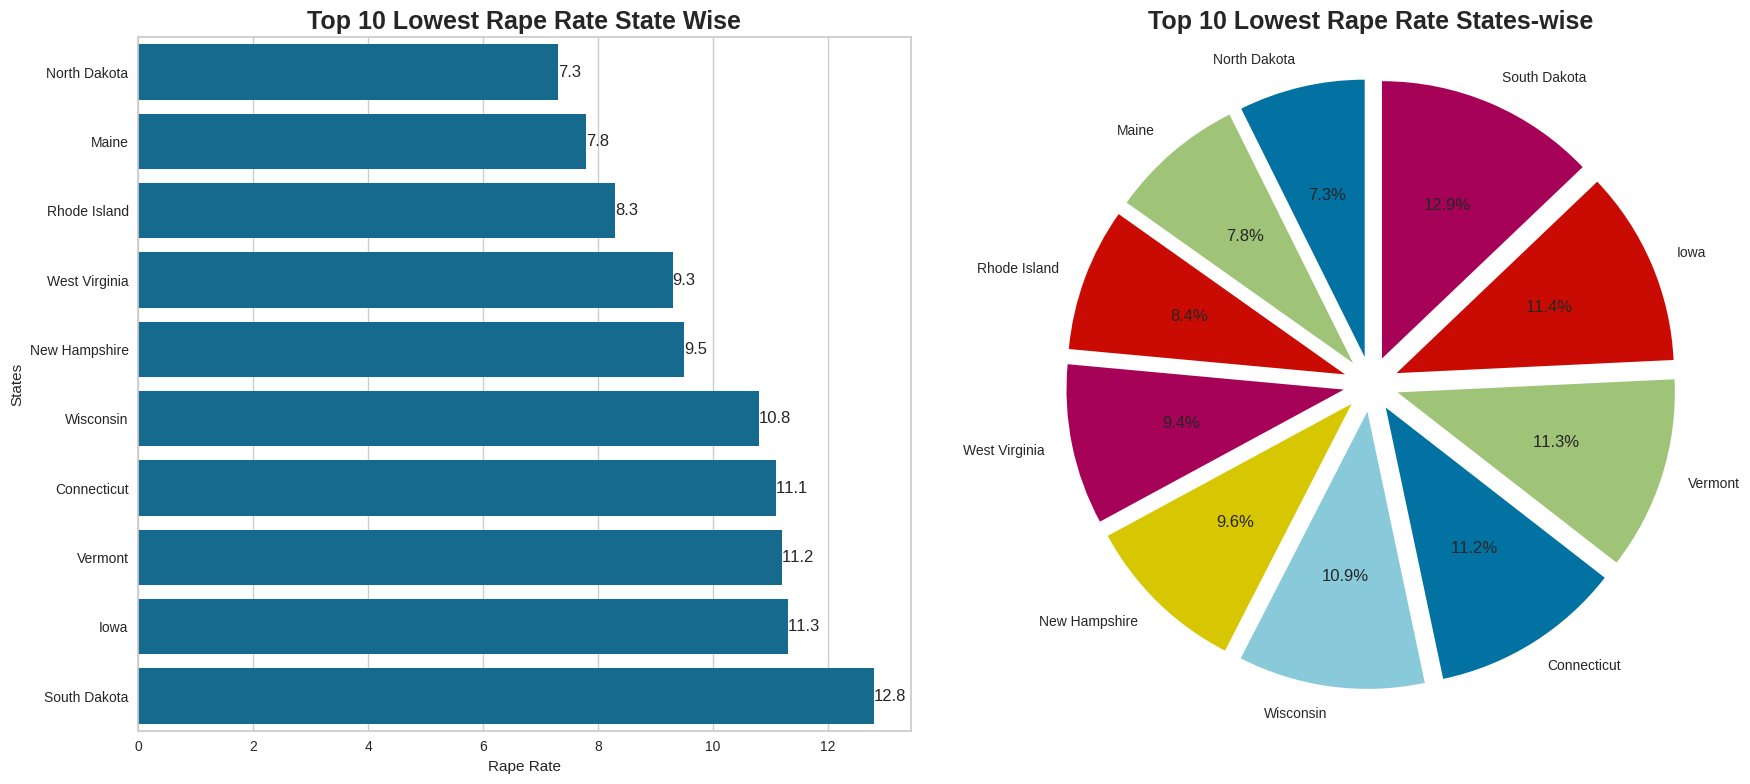

In [46]:
# Sort DataFrame based on Rape in ascending order (lowest to highest)
rape = df.sort_values('Rape', ascending=True)

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plotting bar plot
sns.barplot(x=rape.Rape[:10], y=rape.States[:10], ax=axes[0])
for i, val in enumerate(rape.Rape[:10]):
    axes[0].text(val, i, str(val), va='center', ha='left', fontsize=12)

axes[0].set_title('Top 10 Lowest Rape Rate State Wise', fontsize=18, fontweight='bold')
axes[0].set_xlabel('Rape Rate')
axes[0].set_ylabel('States')

# Plotting pie chart
axes[1].pie(rape.Rape[:10], labels=rape.States[:10], autopct='%1.1f%%', startangle=90, explode=[0.1]*10)
axes[1].set_title("Top 10 Lowest Rape Rate States-wise", fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()

Observations:



*  Highest Rape Rate : Nevada, Alaska and California

*   Lowest Rape Rate : North Dakota, Maine and Rhode Island.




# Urban Population Rate

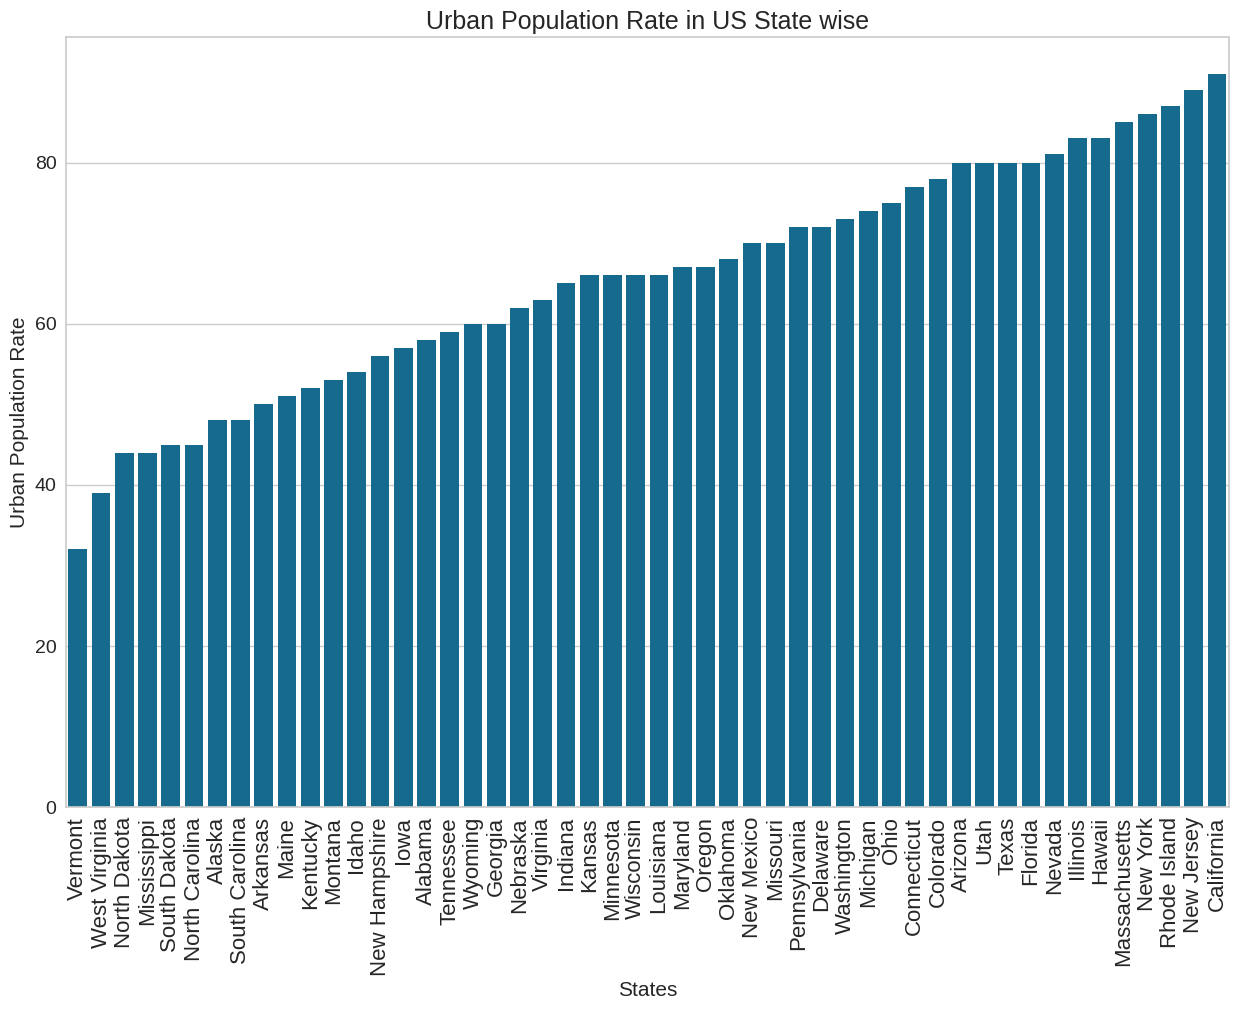

In [51]:
plt.figure(figsize=(15, 10))
# make barplot and sort bars
sns.barplot(x='States',
            y="UrbanPop",
            data=df,
            order=df.sort_values('UrbanPop').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=90, fontsize=16)
plt.title("Urban Population Rate in US State wise", size=18)
plt.show()

In [52]:
print('Top 10 States with Highest Urban Population Rate')
df.sort_values('UrbanPop',ascending=False, ignore_index=True).head(10)

Top 10 States with Highest Urban Population Rate


,States,Murder,Assault,UrbanPop,Rape
0,California,9.0,276,91,40.6
1,New Jersey,7.4,159,89,18.8
2,Rhode Island,3.4,174,87,8.3
3,New York,11.1,254,86,26.1
4,Massachusetts,4.4,149,85,16.3
5,Hawaii,5.3,46,83,20.2
6,Illinois,10.4,249,83,24.0
7,Nevada,12.2,252,81,46.0
8,Texas,12.7,201,80,25.5
9,Arizona,8.1,294,80,31.0


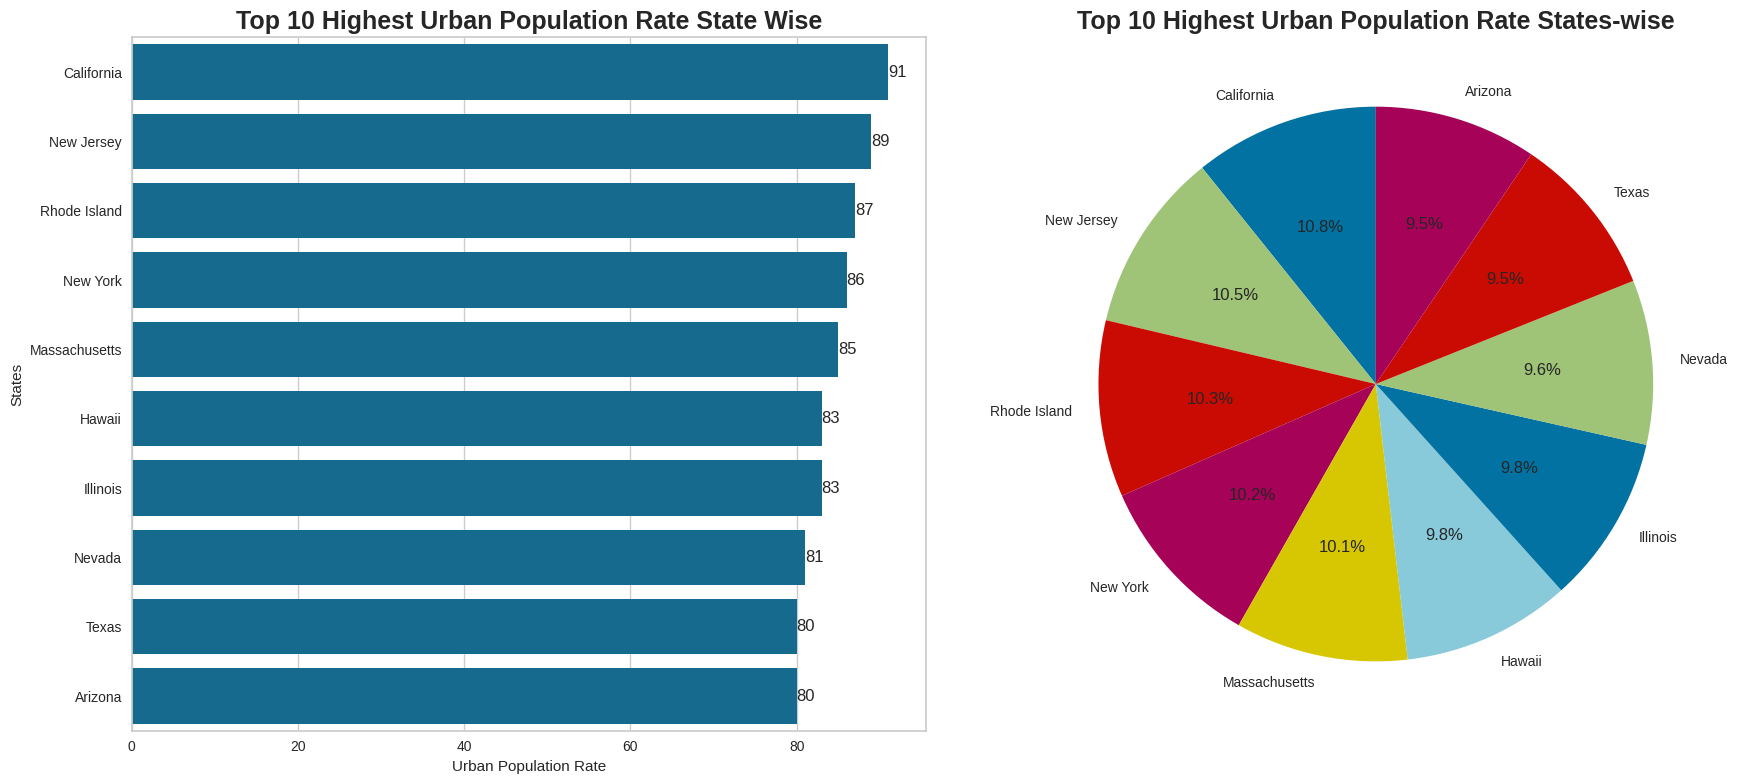

In [54]:
# Sort DataFrame based on UrbanPop
UrbanPop = df.sort_values('UrbanPop', ascending=False)

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plotting bar plot
sns.barplot(x=UrbanPop.UrbanPop[:10], y=UrbanPop.States[:10], ax=axes[0])
for i, val in enumerate(UrbanPop.UrbanPop[:10]):
    axes[0].text(val, i, str(val), va='center', ha='left', fontsize=12)

axes[0].set_title('Top 10 Highest Urban Population Rate State Wise', fontsize=18, fontweight='bold')
axes[0].set_xlabel('Urban Population Rate')
axes[0].set_ylabel('States')

# Plotting pie chart
axes[1].pie(UrbanPop.UrbanPop[:10], labels=UrbanPop.States[:10], autopct='%1.1f%%', startangle=90)
axes[1].set_title("Top 10 Highest Urban Population Rate States-wise", fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()


In [53]:
print('Top 10 States with Lowest Urban Population Rate')
df.sort_values('UrbanPop',ascending=True, ignore_index=True).head(10)

Top 10 States with Lowest Urban Population Rate


,States,Murder,Assault,UrbanPop,Rape
0,Vermont,2.2,48,32,11.2
1,West Virginia,5.7,81,39,9.3
2,North Dakota,0.8,45,44,7.3
3,Mississippi,16.1,259,44,17.1
4,South Dakota,3.8,86,45,12.8
5,North Carolina,13.0,337,45,16.1
6,Alaska,10.0,263,48,44.5
7,South Carolina,14.4,279,48,22.5
8,Arkansas,8.8,190,50,19.5
9,Maine,2.1,83,51,7.8


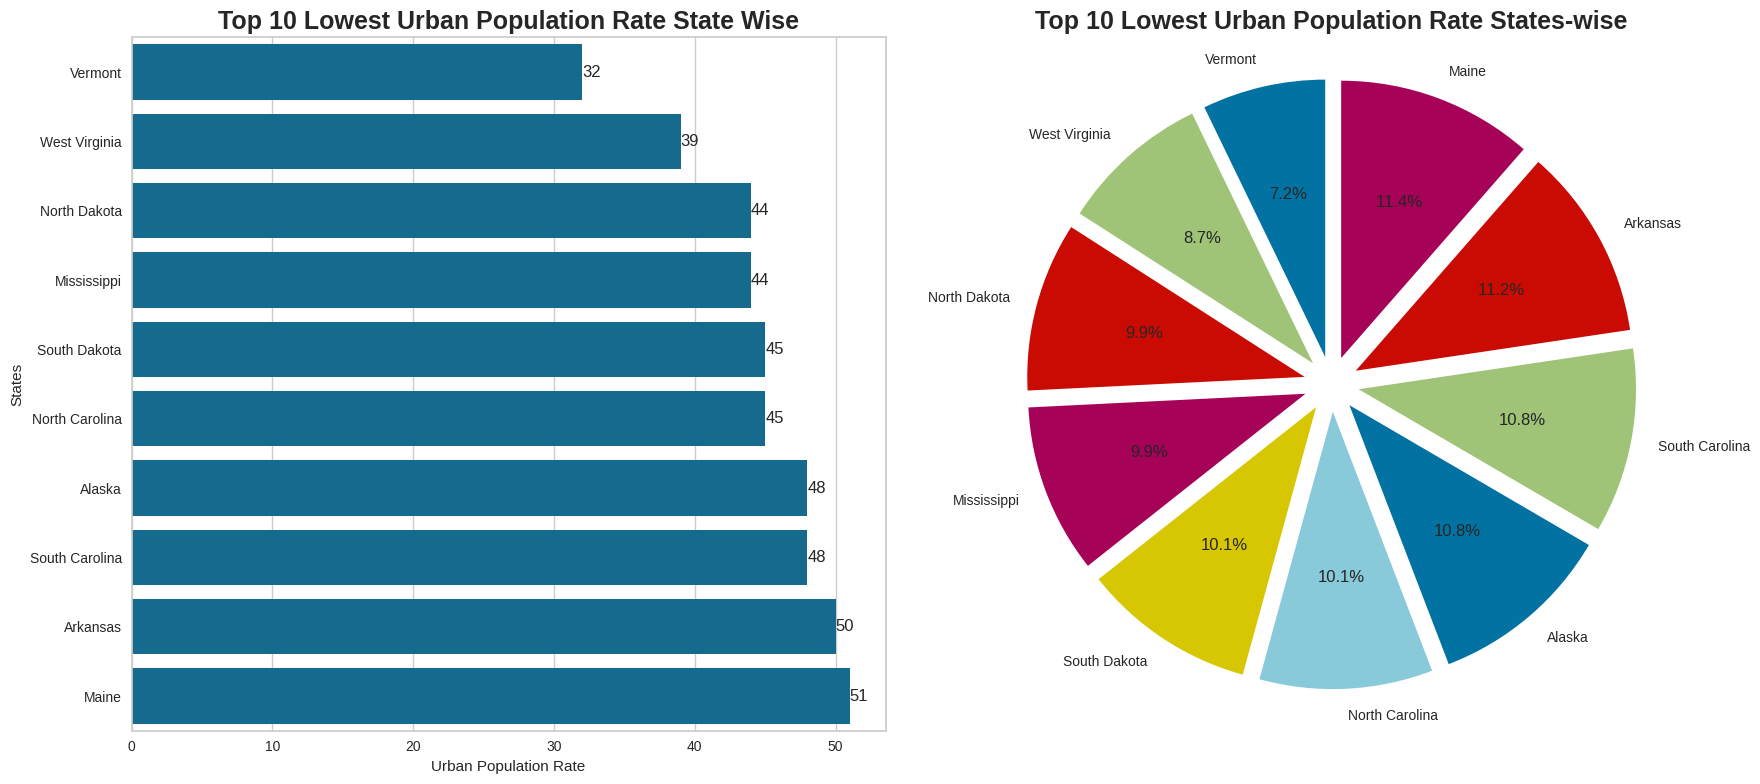

In [55]:
# Sort DataFrame based on UrbanPop in ascending order (lowest to highest)
urbanpop_lowest = df.sort_values('UrbanPop', ascending=True)

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plotting bar plot
sns.barplot(x=urbanpop_lowest.UrbanPop[:10], y=urbanpop_lowest.States[:10], ax=axes[0])
for i, val in enumerate(urbanpop_lowest.UrbanPop[:10]):
    axes[0].text(val, i, str(val), va='center', ha='left', fontsize=12)

axes[0].set_title('Top 10 Lowest Urban Population Rate State Wise', fontsize=18, fontweight='bold')
axes[0].set_xlabel('Urban Population Rate')
axes[0].set_ylabel('States')

# Plotting pie chart
axes[1].pie(urbanpop_lowest.UrbanPop[:10], labels=urbanpop_lowest.States[:10], autopct='%1.1f%%', startangle=90, explode=[0.1]*10)
axes[1].set_title("Top 10 Lowest Urban Population Rate States-wise", fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()


Observations:



*   Highest Urban Population Rate : California, New Jersey and Rhode Island

*  Lowest Urban Population Rate : Vermount, West Virginia and North Dakota.




# Data Preprocessing

Standardizing the Data

In [56]:
df1 = df.set_index('States')
df1.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [57]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df1)
std_df.shape

(50, 4)

Normalizing the data

Using Minmaxscaler for accuracy result comparison

In [58]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df1)
minmax_df.shape

(50, 4)

# KMeans Clustering

In K Means clustering we need to first assign the K number of clusters which can be taken up using the thumb rule of "Sqrt(n)/2" or plotting the Elbow curve, aka Scree plot.

Elbow Method for Determining Cluster Amount

Standard Scaler Applied on Data

In [59]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,200.000000
1,2,104.961633
2,3,80.085695
3,4,57.554259
4,5,50.328022
5,6,43.901766
6,7,40.293950
7,8,35.883985
8,9,31.522562
9,10,28.369211


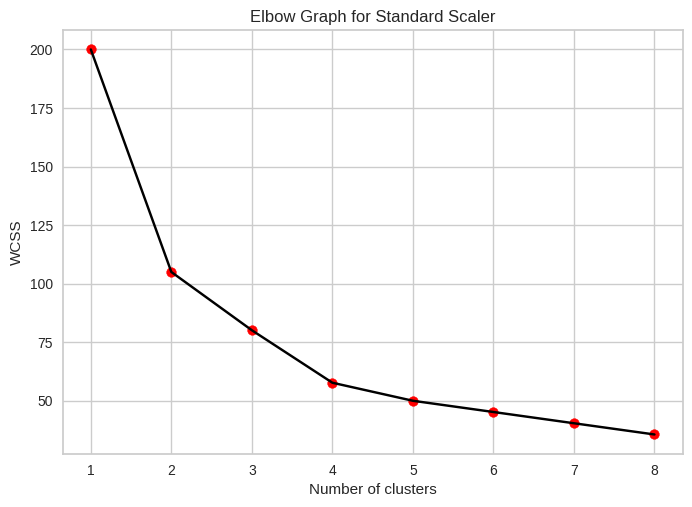

In [60]:
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)

# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Build KMeans Cluster algorithm using K=3 and Standard Scaler Applied Dataset

In [67]:
# we have found good number of cluster = 3
# model building using cluster numbers = 3

model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(50,)

In [68]:
y_predict_kmeans

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [69]:
model_kmeans.labels_

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [70]:
model_kmeans.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.05377053,  1.07340253,  0.19371445,  0.86104144],
       [-0.41081687, -0.32571014,  0.4740874 , -0.20357044]])

In [71]:
model_kmeans.inertia_

80.0888613219962

The lower values of inertia are better and zero is optimal.

Inertia is the sum of squared error for each cluster.

Therefore the smaller the inertia the denser the cluster(closer together all the points are)

In [72]:
df1['Kmeans_label'] = model_kmeans.labels_

In [73]:
df1.groupby('Kmeans_label').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Kmeans_label,,,,
0,3.600000,78.538462,52.076923,12.176923
1,12.331579,259.315789,68.315789,29.215789
2,6.016667,143.888889,72.333333,19.344444


In [75]:
print(df1['Kmeans_label'].unique())

[1 2 0]


In [76]:
df1[df1['Kmeans_label']==0]

,Murder,Assault,UrbanPop,Rape,Kmeans_label
States,,,,,
Idaho,2.6,120,54,14.2,0
Iowa,2.2,56,57,11.3,0
Kentucky,9.7,109,52,16.3,0
Maine,2.1,83,51,7.8,0
Minnesota,2.7,72,66,14.9,0
Montana,6.0,109,53,16.4,0
Nebraska,4.3,102,62,16.5,0
New Hampshire,2.1,57,56,9.5,0
North Dakota,0.8,45,44,7.3,0


In [77]:
df1[df1['Kmeans_label']==1]

,Murder,Assault,UrbanPop,Rape,Kmeans_label
States,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,1
Florida,15.4,335,80,31.9,1
Georgia,17.4,211,60,25.8,1
Illinois,10.4,249,83,24.0,1
Louisiana,15.4,249,66,22.2,1


In [78]:
df1[df1['Kmeans_label']==2]

,Murder,Assault,UrbanPop,Rape,Kmeans_label
States,,,,,
Arkansas,8.8,190,50,19.5,2
Connecticut,3.3,110,77,11.1,2
Delaware,5.9,238,72,15.8,2
Hawaii,5.3,46,83,20.2,2
Indiana,7.2,113,65,21.0,2
Kansas,6.0,115,66,18.0,2
Massachusetts,4.4,149,85,16.3,2
Missouri,9.0,178,70,28.2,2
New Jersey,7.4,159,89,18.8,2


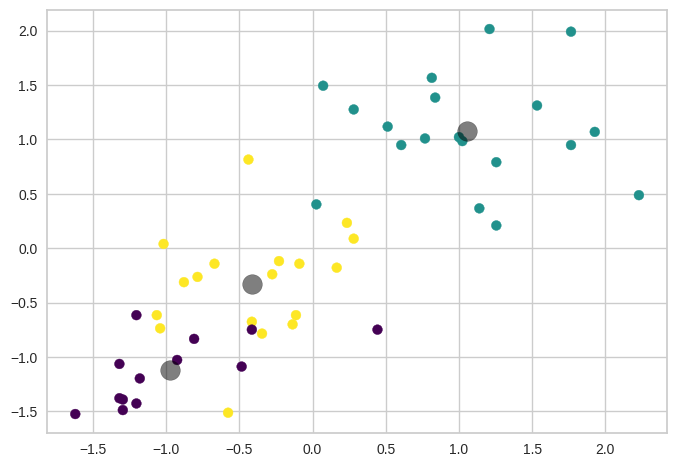

In [79]:
plt.scatter(std_df[:,0], std_df[:,1], c = model_kmeans.labels_, s = 50, cmap = "viridis")
centers = model_kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5)

Observations:



*   The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.

*   The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.


*   The Cities in Cluster-2 seems to have Moderate crime rates and can be regarded as Moderate-Zone






# Hierarchical Clustering Algorithm

Dendogram on MinMaxScaler Applied on Dataset

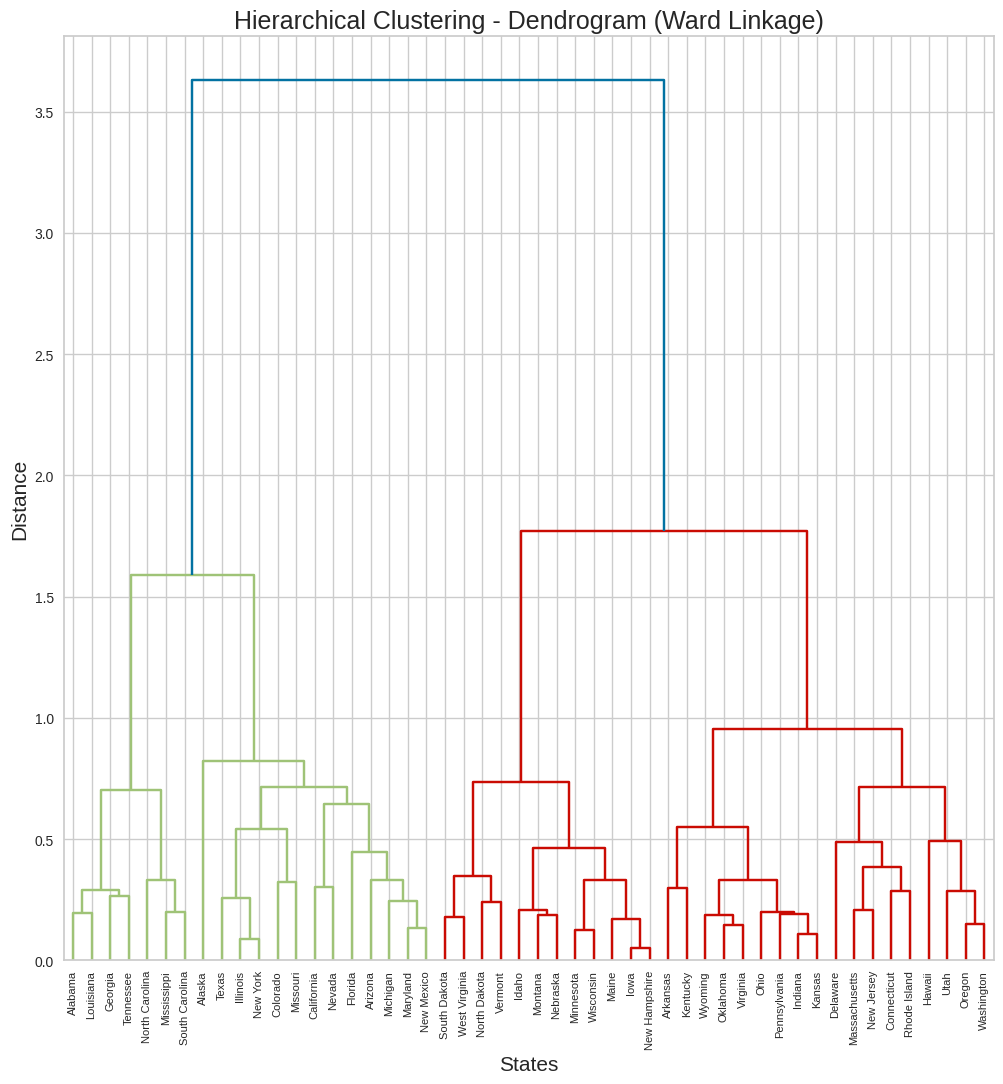

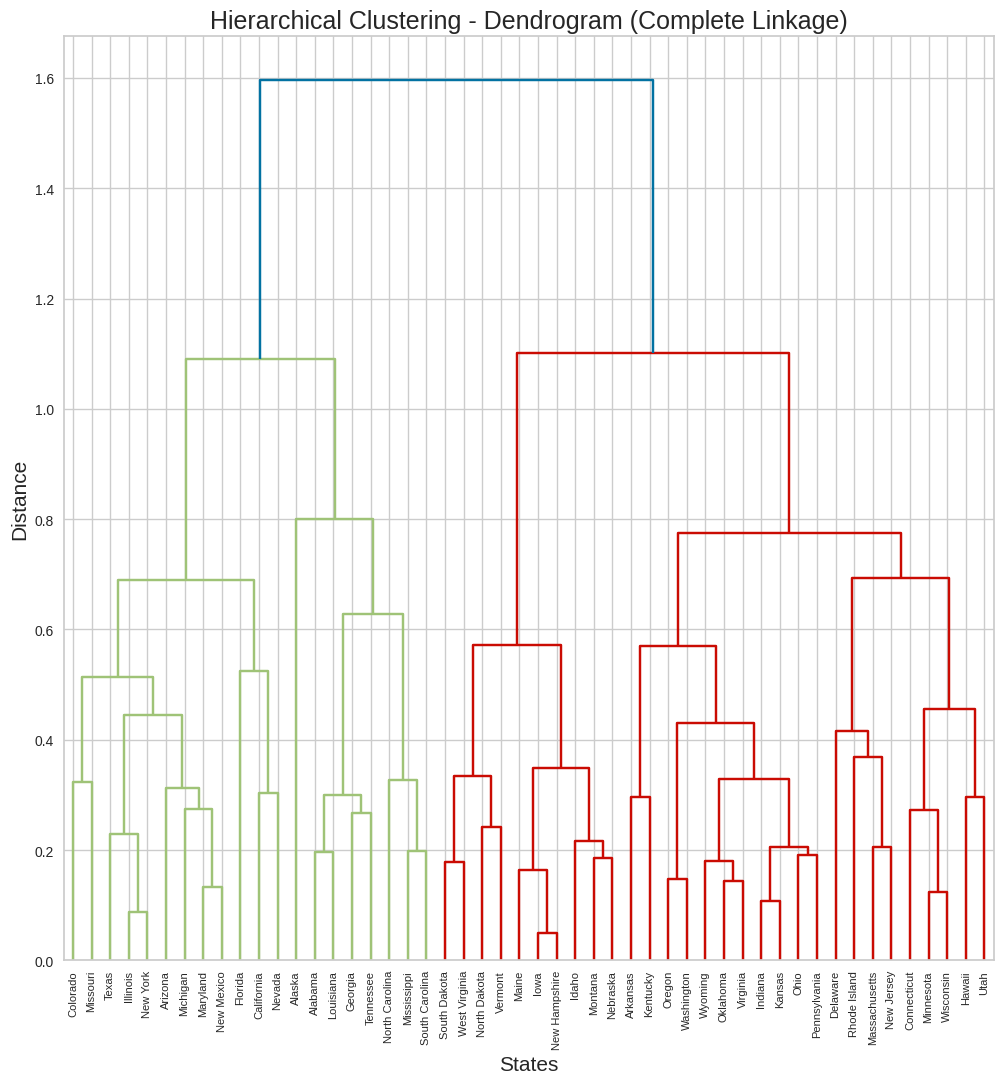

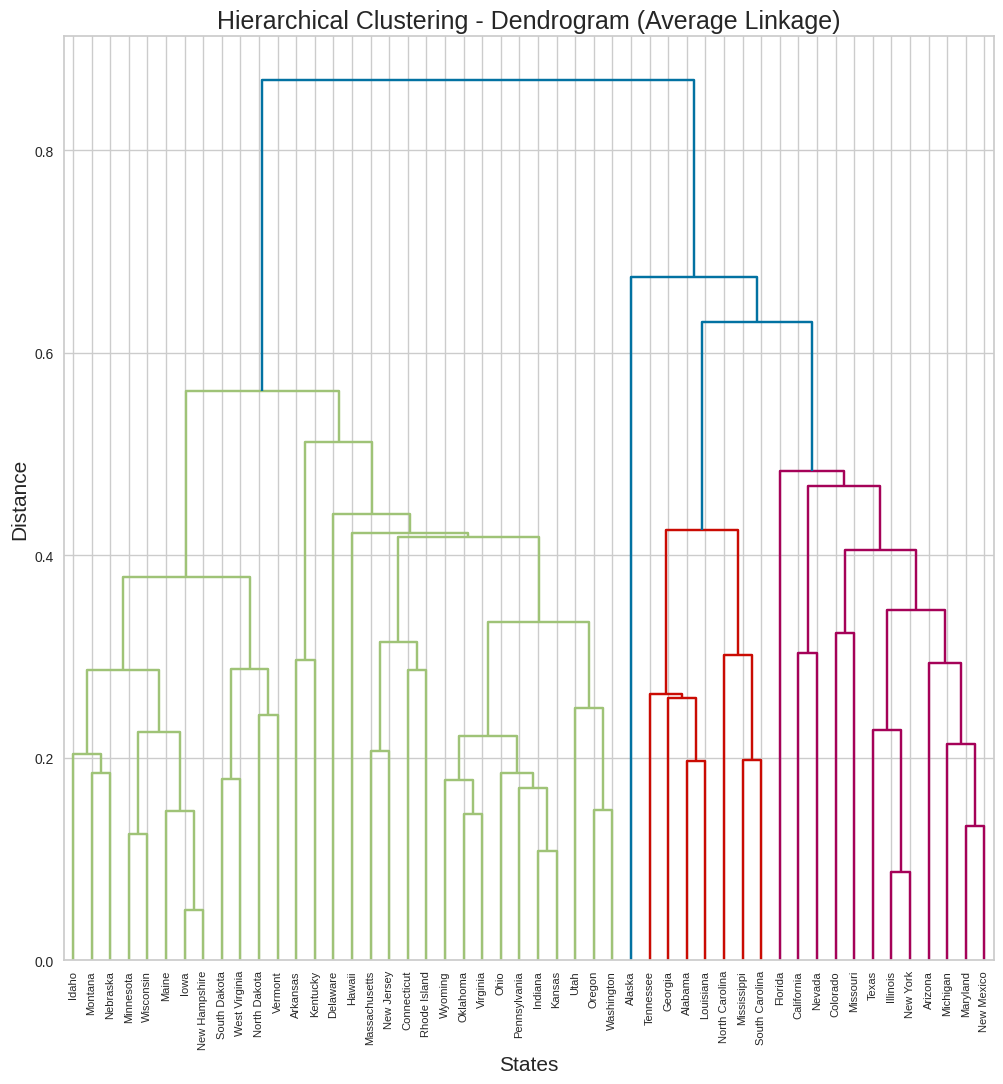

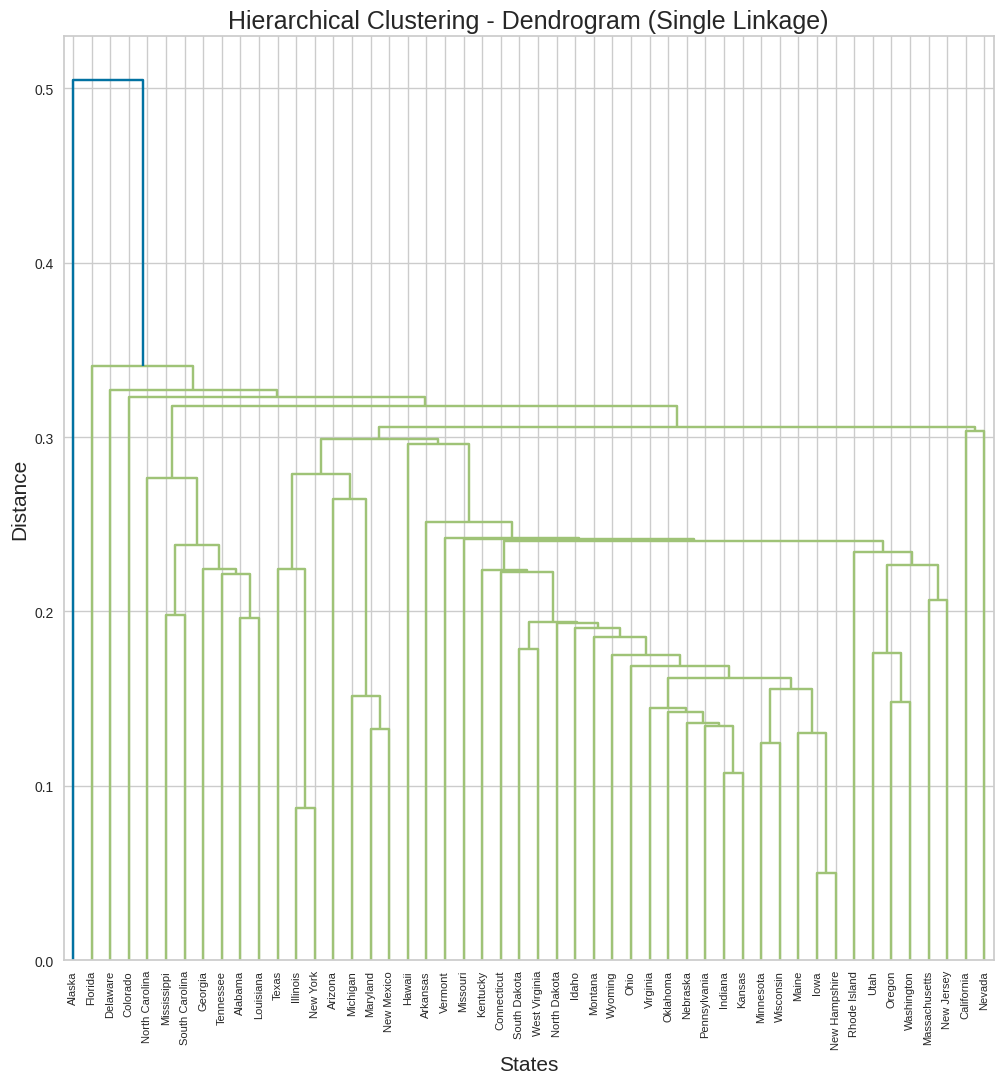

In [85]:
for linkage in ['ward', 'complete', 'average', 'single']:

  plt.figure(figsize=(12, 12))
  dend = sch.dendrogram(sch.linkage(minmax_df, method=linkage), labels=df1.index)
  plt.title('Hierarchical Clustering - Dendrogram ({} Linkage)'.format(linkage.capitalize()), size=18)
  plt.xlabel('States', size=15)
  plt.ylabel('Distance', size=15)
  plt.tick_params(axis='x', rotation=90)
  plt.show()

The seperation in Each Method indicate that 2 as the optimal number for clusters.

Run Hierarchical Clustering.(Agglomerative Clustering)

In [86]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(minmax_df)
print(y_pred_hie.shape)
y_pred_hie

(50,)


array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [87]:
# Cluster numbers

agg_clustering.n_clusters_

2

In [88]:
# Clustering Score

(sil(minmax_df, agg_clustering.labels_)*100).round(3)

42.364

Putting Cluster lables into original dataset And analysis of the same

In [89]:
df1['Hierarchical_labels'] = agg_clustering.labels_

In [90]:
df1.groupby('Hierarchical_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_label
,mean,mean,mean,mean,mean
Hierarchical_labels,,,,,
0,4.870,114.433333,63.633333,15.943333,1.133333
1,12.165,255.250000,68.400000,29.165000,1.050000


<Axes: xlabel='Hierarchical_labels', ylabel='Murder'>

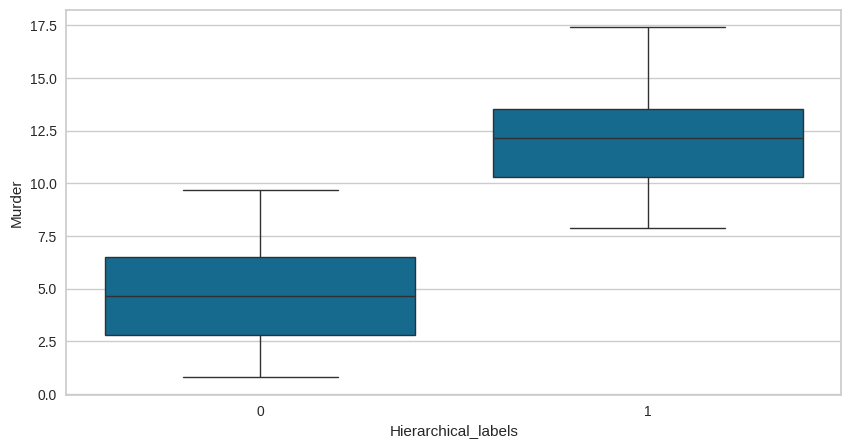

In [91]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_labels', y='Murder', data=df1)

<Axes: xlabel='Hierarchical_labels', ylabel='Assault'>

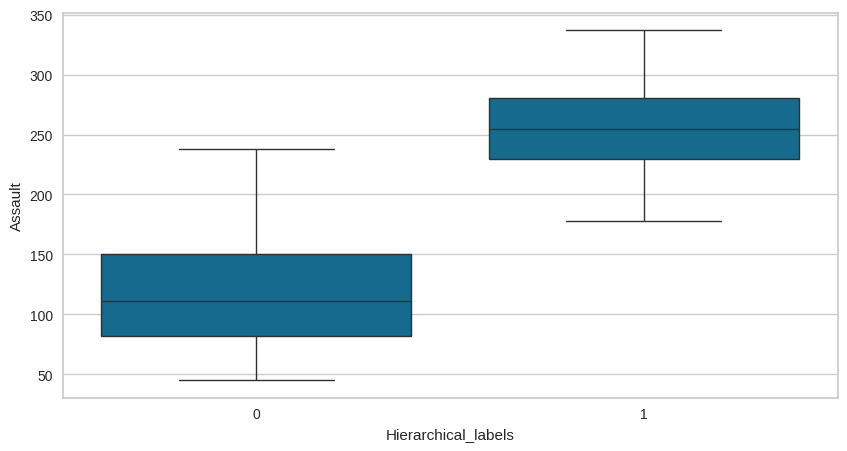

In [92]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_labels', y='Assault', data=df1)

<Axes: xlabel='Hierarchical_labels', ylabel='Rape'>

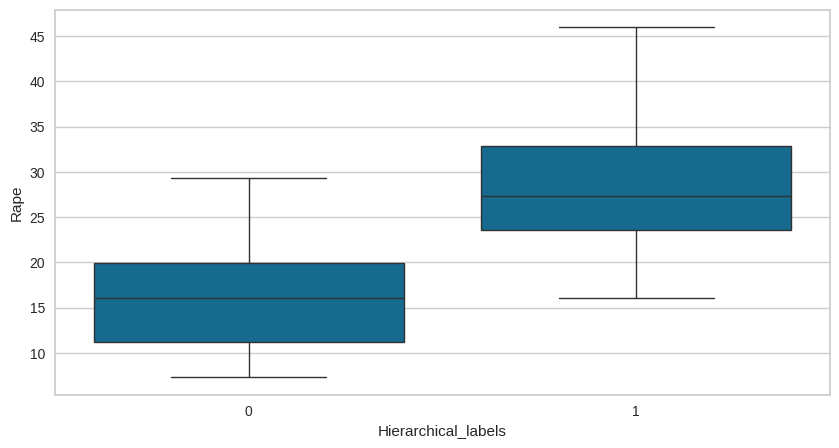

In [93]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_labels', y='Rape', data=df1)

Observations:



*   The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.
*   The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.



# DBSCAN - (Density Based Spatial Clustering of Applications with Noise)

DBSCAN of Standard Scaled Data

To choose the best combination of the algorithm parameters I will first create a matrix of investigated combinations.

In [96]:
from itertools import product

eps_values = np.arange(0.25,2,0.25) # eps values to be investigated
min_samples = np.arange(1,3)# min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [97]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(sil(std_df, DBS_clustering.labels_))

Collecting number of generated clusters.

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


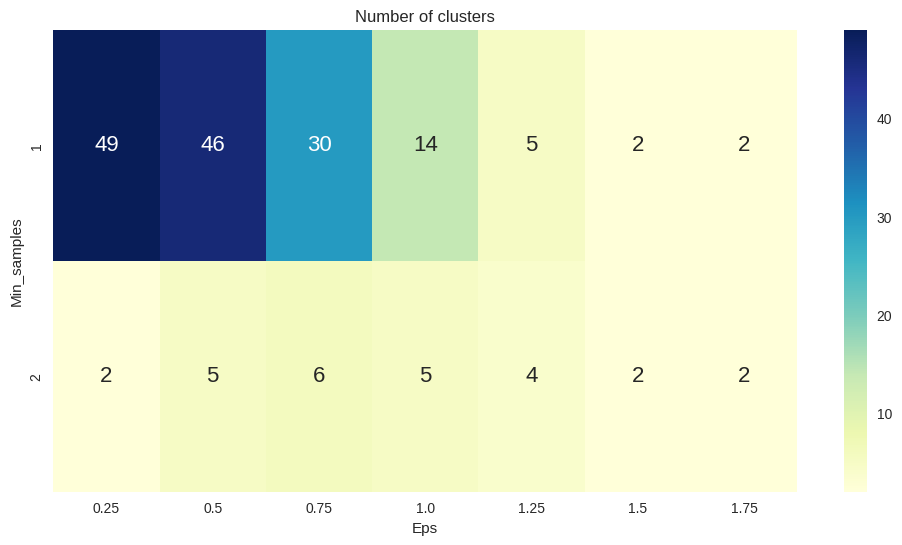

In [98]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

As the heatplot above shows, the number of clusters vary from 49 to 2.


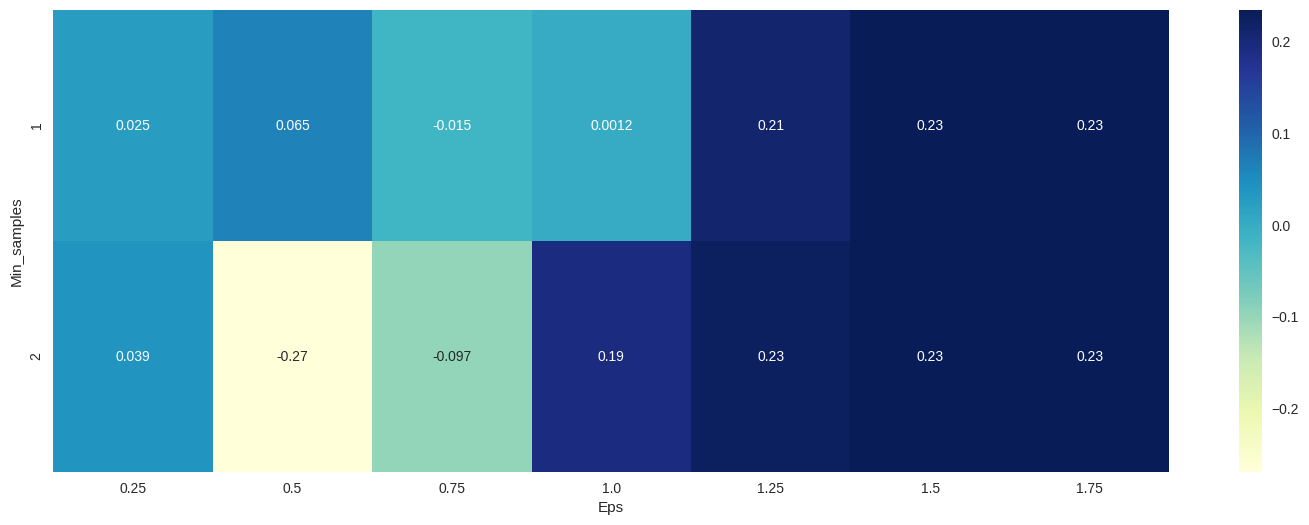

In [99]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Global maximum is 0.23 for eps=1.25 and min_samples=2

In [100]:
epsilon = [0.25,0.50,0.75,1,1.25,1.50,1.75,2]
min_samples = [1,2]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_df)
        #cluster_labels=dbscan.fit_predict(data)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2])


epsilon= 0 
min_sample= 0 
number of clusters= 0


Run DBSCAN on Standard Scaled data with optimal min_sample and epsilon values

In [101]:
dbscan = DBSCAN(eps=1.5, min_samples=1)
dbscan.fit(std_df)

DBSCAN(eps=1.5, min_samples=1)

In [102]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

-1 are the noise points in our dataset and the rest are the clusters

In [103]:
df1['DBSCAN_labels'] = dbscan.labels_
df1.head()

,Murder,Assault,UrbanPop,Rape,Kmeans_label,Hierarchical_labels,DBSCAN_labels
States,,,,,,,
Alabama,13.2,236,58,21.2,1,1,0
Alaska,10.0,263,48,44.5,1,1,1
Arizona,8.1,294,80,31.0,1,1,0
Arkansas,8.8,190,50,19.5,2,0,0
California,9.0,276,91,40.6,1,1,0


In [104]:
df1.groupby('DBSCAN_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_label,Hierarchical_labels
,mean,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,,
0,7.742857,168.877551,65.897959,20.757143,1.102041,0.387755
1,10.000000,263.000000,48.000000,44.500000,1.000000,1.000000


In [115]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(df1.loc[df1.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df1.loc[df1.DBSCAN_labels==1].mean(),columns= ['Cluster2_avg'])

In [116]:
avg_df = pd.concat([cluster1,cluster2],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg
Murder,7.742857,10.0
Assault,168.877551,263.0
UrbanPop,65.897959,48.0
Rape,20.757143,44.5
Kmeans_label,1.102041,1.0
Hierarchical_labels,0.387755,1.0
DBSCAN_labels,0.000000,1.0


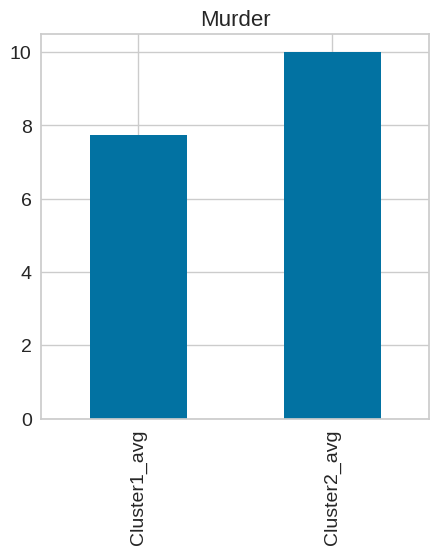

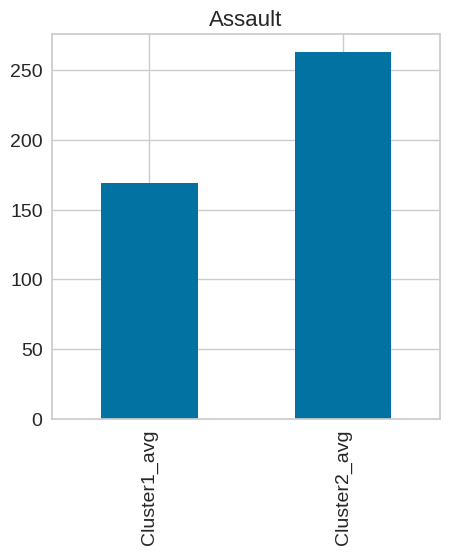

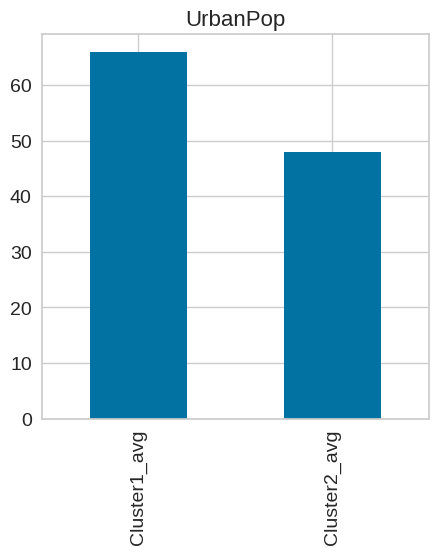

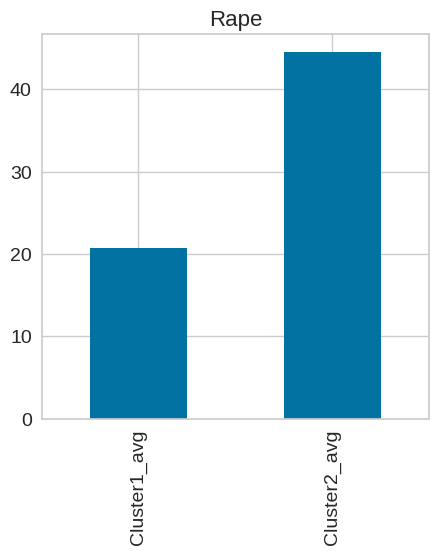

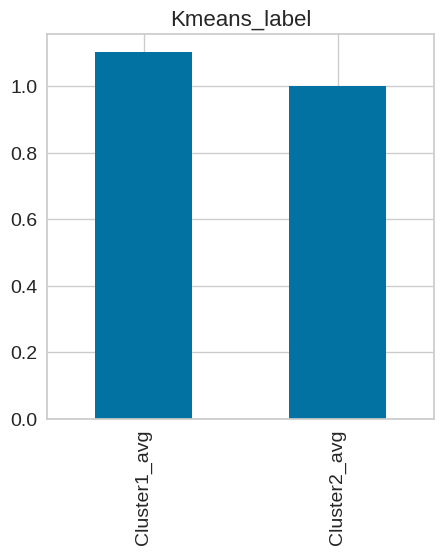

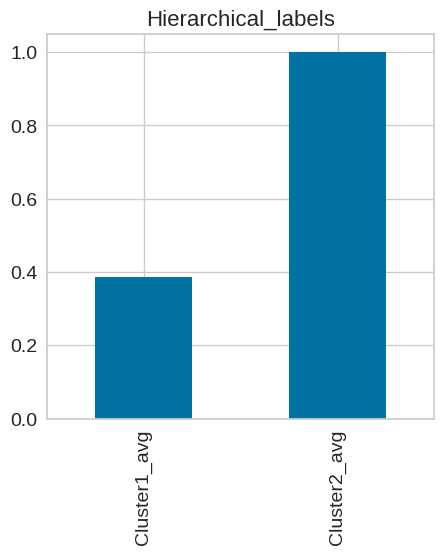

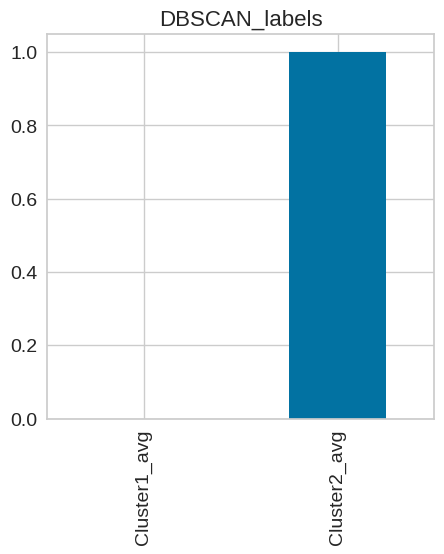

In [119]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(5,5))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

Observations:



*   The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.
*   The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.



# Conclusion:

I have applied EDA to analyze dataset.Discovered correlation between different variables and found colinearity.

Applied Standardazation & MinMaxScalar transformation on the dataset
I have used & analyzed two clustering techniques here..

i) KMeans,

ii) Hierarchical Clusterig &

iii) DBSCAN.

By applying clustering on different algorithims the Standard Scaler found less score so not used for further model building.
KMeans clustering is sensitive to outliers
